<a href="https://colab.research.google.com/github/hibahkhan2022/NDLProjects/blob/main/Khan_Hibah_EKGSignals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

Associated with Penn State University
In this project I look at applying deep learning techniques into medical technology. This research focuses on Long Short-Term Memory (LSTM) networks for classifying EKG signals into either normal or abnormal RR intervals. The project begins by preprocessing raw EKG signals and taking out RR intervals, then using LSTMs to classify the data. In preprocessing, the model included bandpass filtering, normalization, and smoothing techniques to reduce noise and improve signal quality.

## 1. Setup Kaggle API Access
If we want to download a dataset from Kaggle we need access to the API



In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


In [ ]:
import kagglehub
!pip install kaggle


import os

# Set up Kaggle API credentials
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'

# Download the dataset
!kaggle datasets download -d protobioengineering/mit-bih-arrhythmia-database-modern-2023 -p /mnt/data --unzip


Dataset URL: https://www.kaggle.com/datasets/protobioengineering/mit-bih-arrhythmia-database-modern-2023
License(s): CC-BY-SA-4.0
 97% 227M/235M [00:02<00:00, 147MB/s]
100% 235M/235M [00:02<00:00, 98.2MB/s]


In [ ]:
import os

# Verify the path to dataset files
dataset_path = "/mnt/data"
files = os.listdir(dataset_path)
print("Path to dataset files:", dataset_path)
print("Files:", files)


Path to dataset files: /mnt/data
Files: ['207.csv', '116.csv', '106.csv', '119.csv', '233.csv', '121.csv', '208.csv', '222.csv', '210.csv', '209.csv', '115.csv', '113.csv', '231.csv', '202.csv', '220.csv', '124.csv', '223.csv', '109.csv', '108.csv', '232.csv', '100.csv', '118.csv', '107.csv', '122.csv', '111.csv', '219.csv', '102.csv', '101.csv', '213.csv', '201.csv', '215.csv', '228.csv', '214.csv', '105.csv', '205.csv', '217.csv', '200.csv', '112.csv', '212.csv', '123.csv', '234.csv', '117.csv', '221.csv', '114.csv', '104.csv', '103.csv', '203.csv', '230.csv']


In [ ]:
import os

# Path to dataset folder
dataset_path = "/mnt/data"

# List all files in the dataset folder
files = os.listdir(dataset_path)
print("Files in dataset folder:")
for file in files:
    print(file)



Files in dataset folder:
207.csv
116.csv
106.csv
119.csv
233.csv
121.csv
208.csv
222.csv
210.csv
209.csv
115.csv
113.csv
231.csv
202.csv
220.csv
124.csv
223.csv
109.csv
108.csv
232.csv
100.csv
118.csv
107.csv
122.csv
111.csv
219.csv
102.csv
101.csv
213.csv
201.csv
215.csv
228.csv
214.csv
105.csv
205.csv
217.csv
200.csv
112.csv
212.csv
123.csv
234.csv
117.csv
221.csv
114.csv
104.csv
103.csv
203.csv
230.csv


## 2. Access all Files

In [ ]:
import os
import pandas as pd

# Path to the dataset folder
dataset_path = "/mnt/data"

# List all files in the dataset folder
file_names = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]  # Filter for CSV files
print("Files in the dataset folder:", file_names)

# Initialize a dictionary to store data from multiple files
all_data = {}

# Iterate over the file names
for file_name in file_names:
    file_path = os.path.join(dataset_path, file_name)
    try:
        # Load each file
        data = pd.read_csv(file_path)
        print(f"Columns in {file_name}:", data.columns)
        print(data.head())  # Print the first few rows of each file

        # Store the data in a dictionary for later use
        all_data[file_name] = data
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

# Example: Access data from a specific file
example_file = file_names[0]  # Replace with the desired file name
if example_file in all_data:
    print(f"Data from {example_file}:")
    print(all_data[example_file].head())



Files in the dataset folder: ['207.csv', '116.csv', '106.csv', '119.csv', '233.csv', '121.csv', '208.csv', '222.csv', '210.csv', '209.csv', '115.csv', '113.csv', '231.csv', '202.csv', '220.csv', '124.csv', '223.csv', '109.csv', '108.csv', '232.csv', '100.csv', '118.csv', '107.csv', '122.csv', '111.csv', '219.csv', '102.csv', '101.csv', '213.csv', '201.csv', '215.csv', '228.csv', '214.csv', '105.csv', '205.csv', '217.csv', '200.csv', '112.csv', '212.csv', '123.csv', '234.csv', '117.csv', '221.csv', '114.csv', '104.csv', '103.csv', '203.csv', '230.csv']
Columns in 207.csv: Index(['Unnamed: 0', 'time_ms', 'MLII', 'V1'], dtype='object')
   Unnamed: 0    time_ms   MLII     V1
0           0   0.000000 -0.215  0.095
1           1   2.777778 -0.215  0.095
2           2   5.555556 -0.215  0.095
3           3   8.333333 -0.215  0.095
4           4  11.111111 -0.215  0.095
Columns in 116.csv: Index(['Unnamed: 0', 'time_ms', 'MLII', 'V1'], dtype='object')
   Unnamed: 0    time_ms  MLII    V1
0    

Files in the dataset folder: ['207.csv', '116.csv', '106.csv', '119.csv', '233.csv', '121.csv', '208.csv', '222.csv', '210.csv', '209.csv', '115.csv', '113.csv', '231.csv', '202.csv', '220.csv', '124.csv', '223.csv', '109.csv', '108.csv', '232.csv', '100.csv', '118.csv', '107.csv', '122.csv', '111.csv', '219.csv', '102.csv', '101.csv', '213.csv', '201.csv', '215.csv', '228.csv', '214.csv', '105.csv', '205.csv', '217.csv', '200.csv', '112.csv', '212.csv', '123.csv', '234.csv', '117.csv', '221.csv', '114.csv', '104.csv', '103.csv', '203.csv', '230.csv']


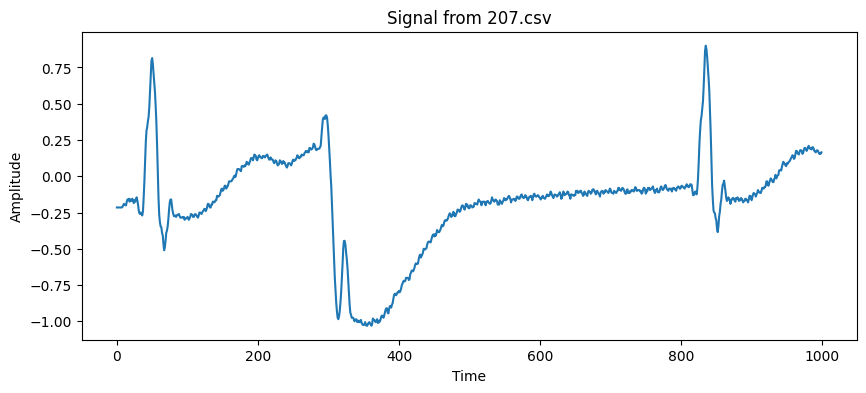

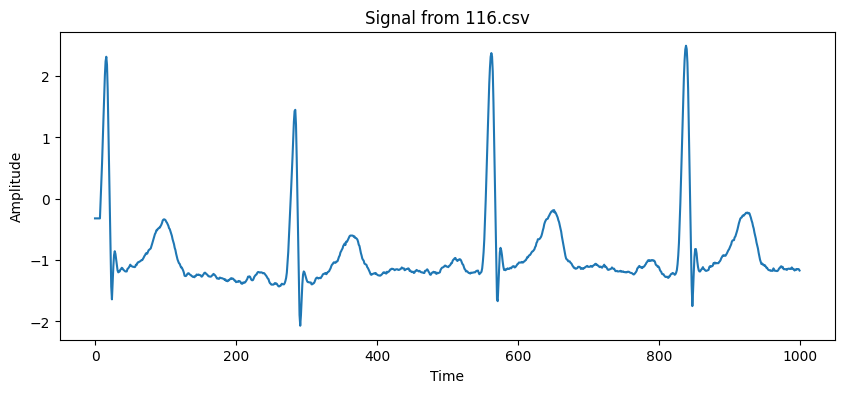

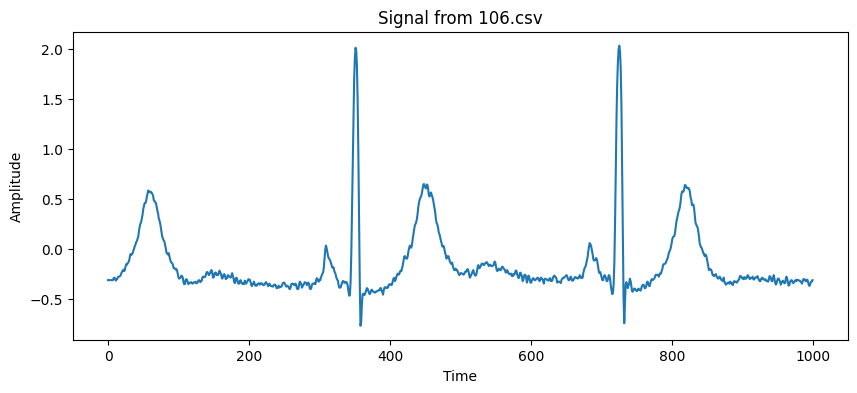

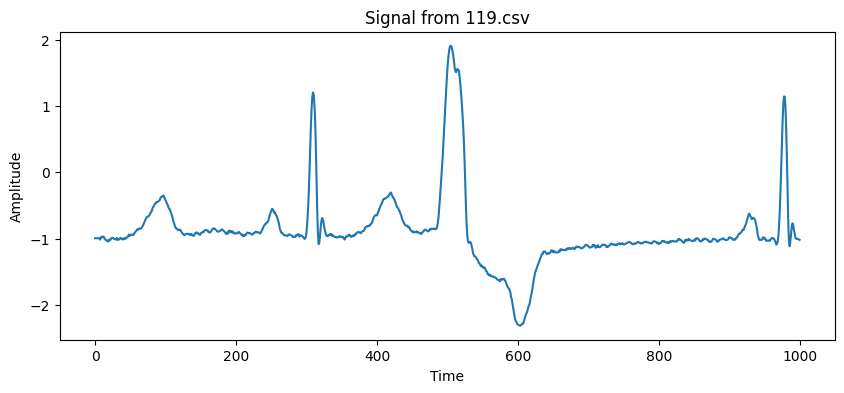

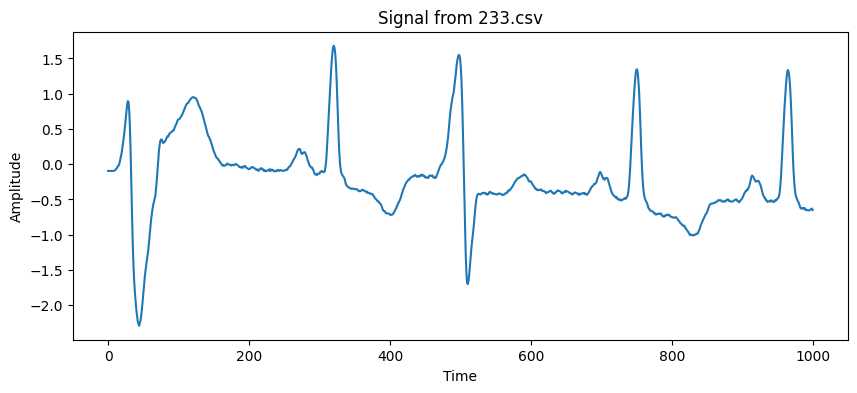

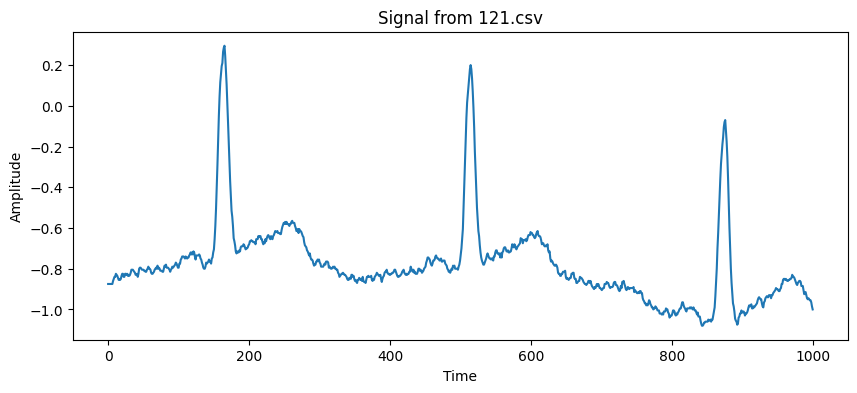

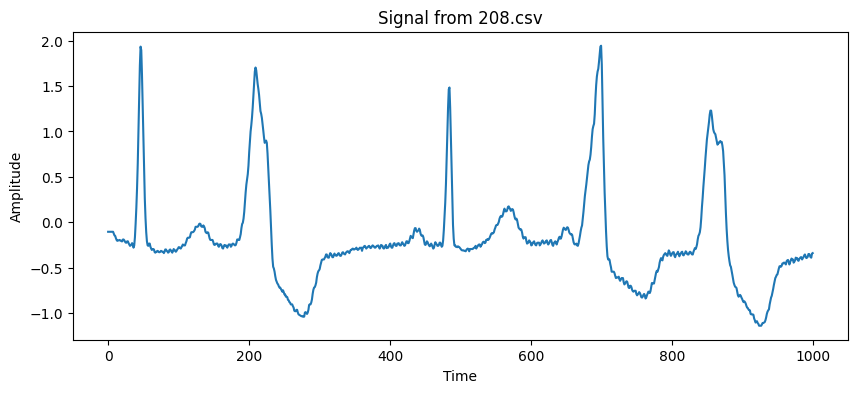

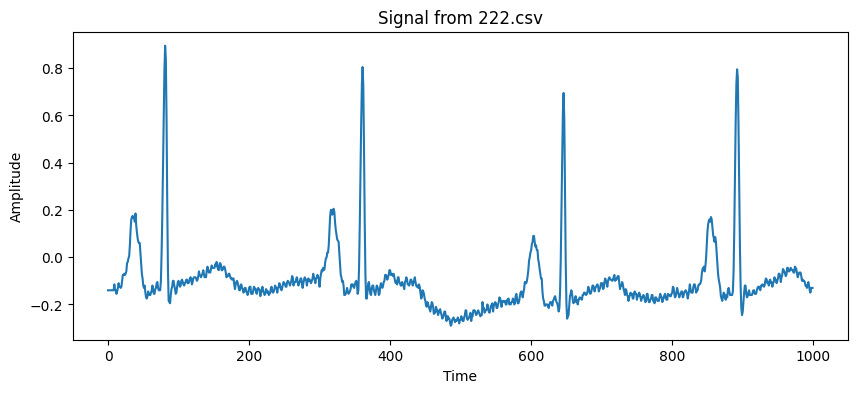

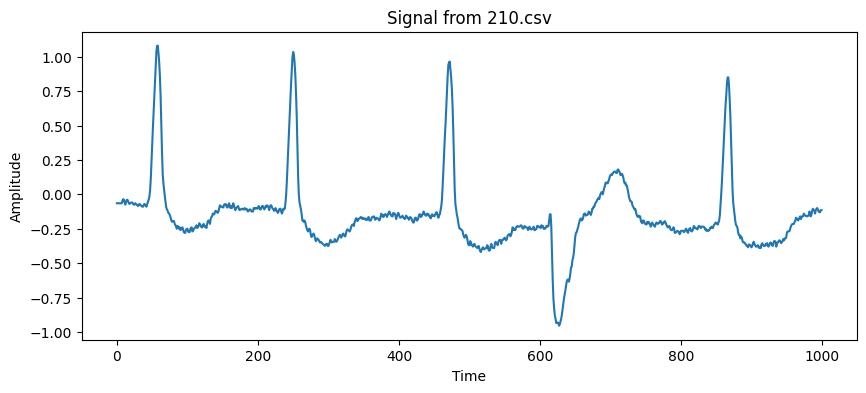

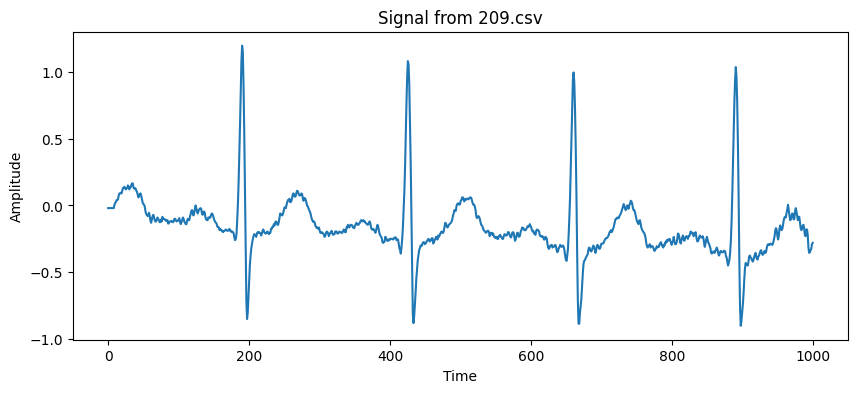

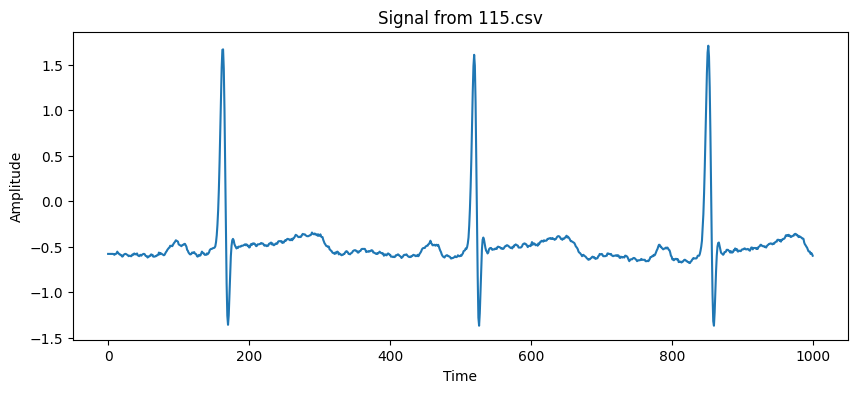

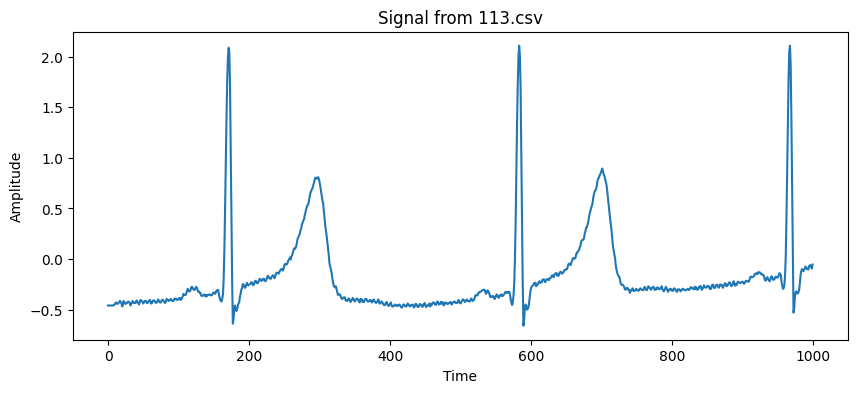

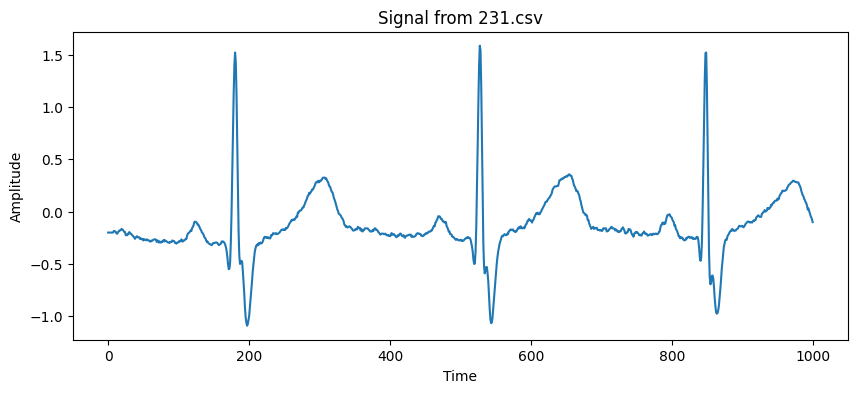

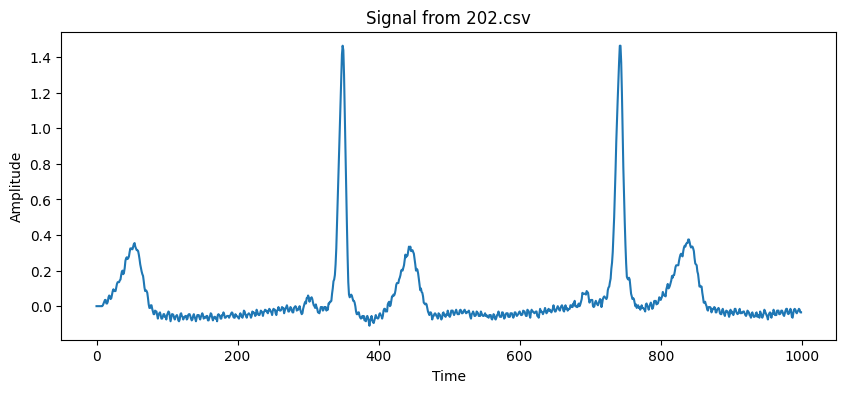

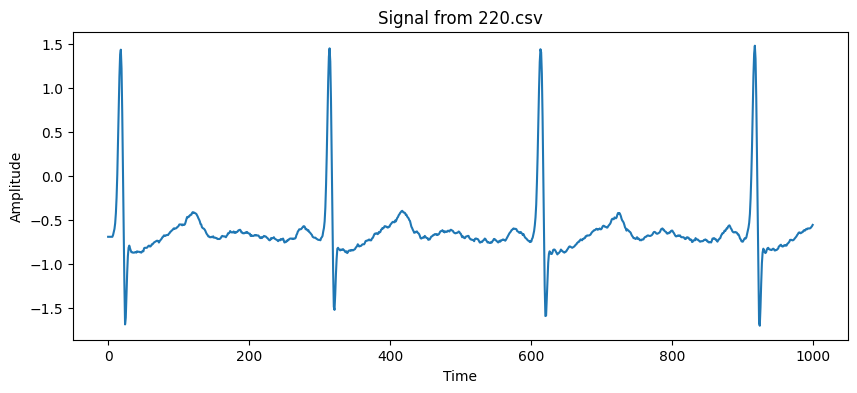

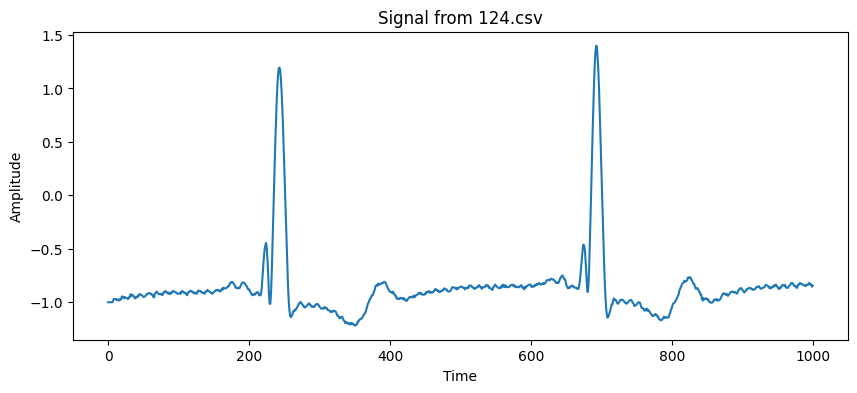

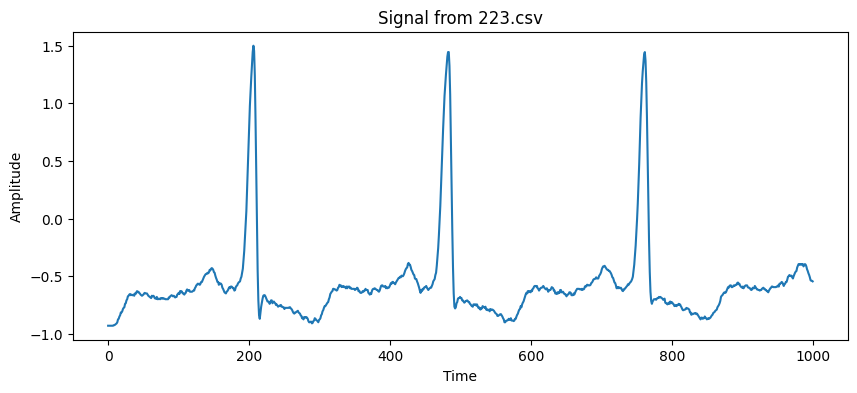

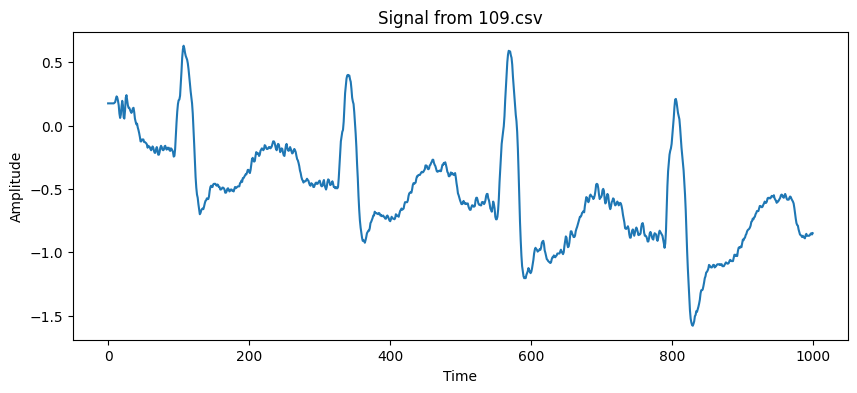

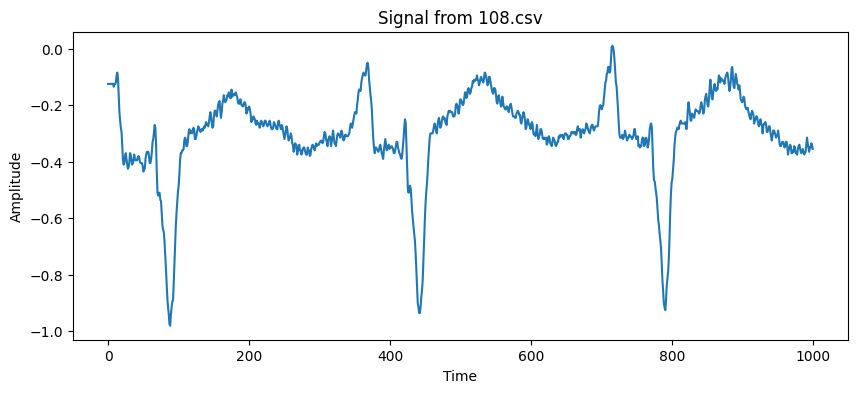

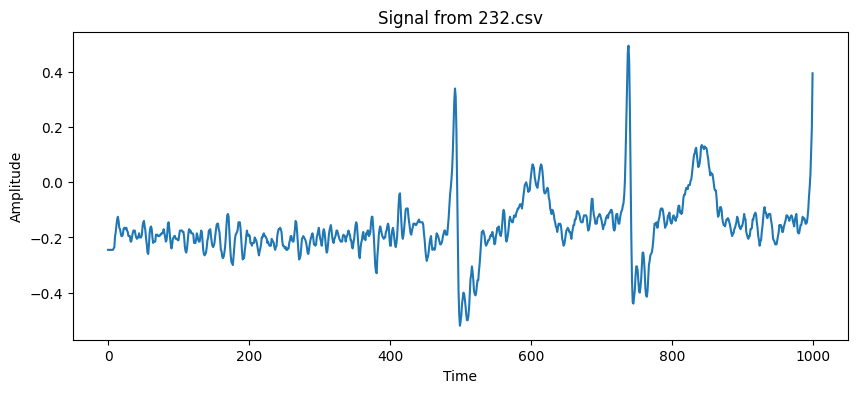

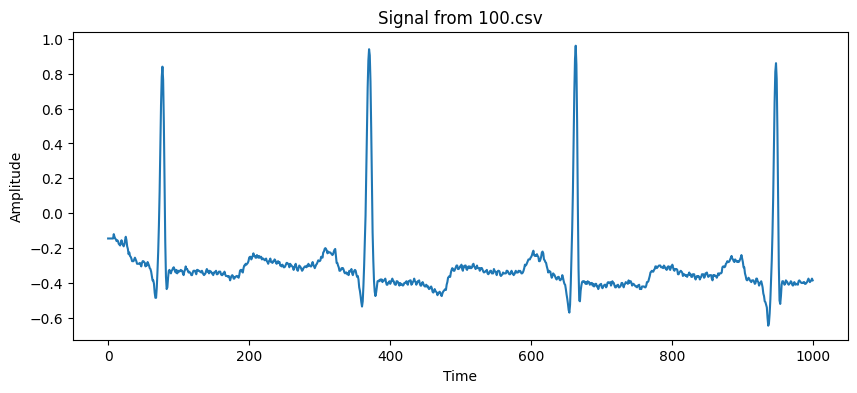

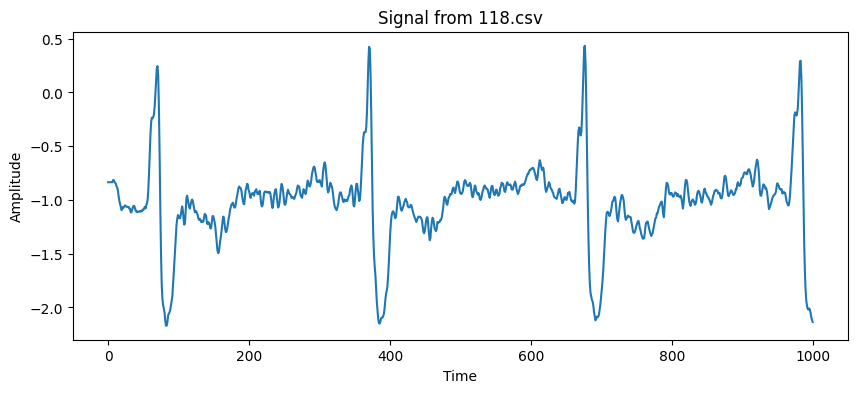

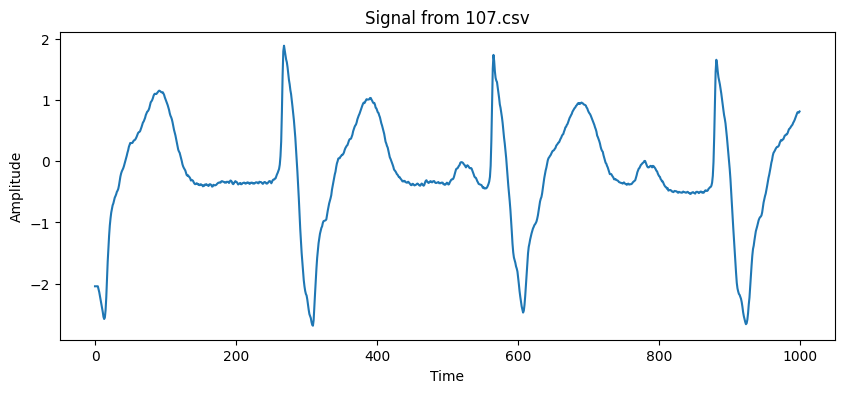

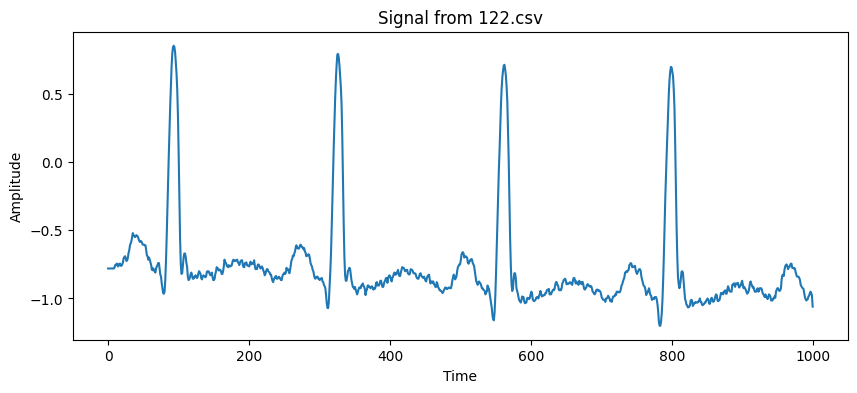

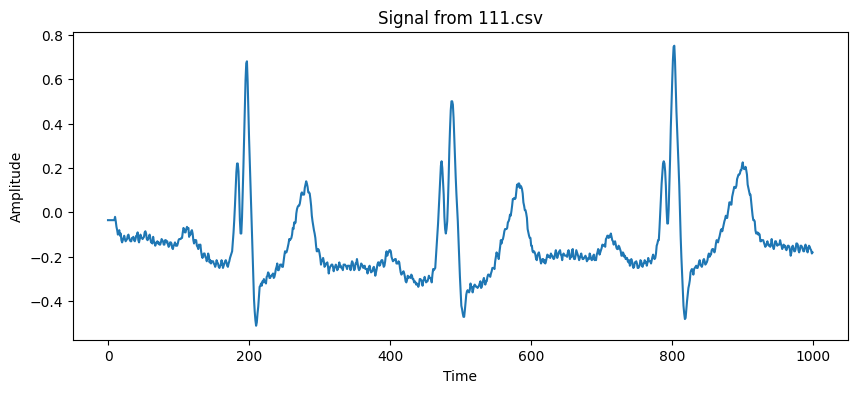

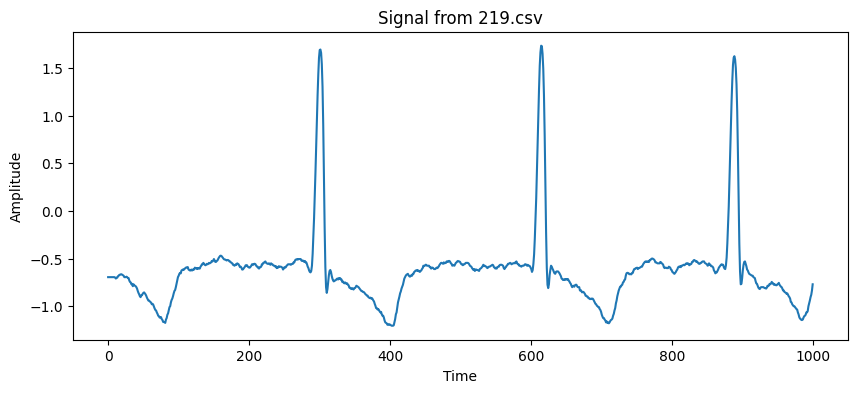

Column 'MLII' not found in 102.csv


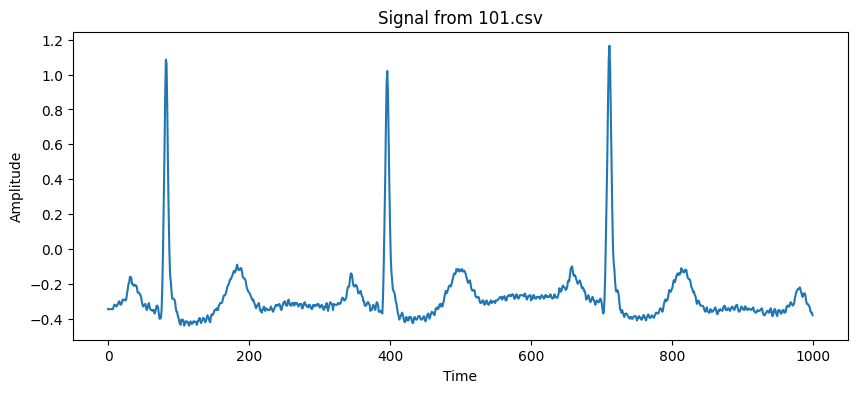

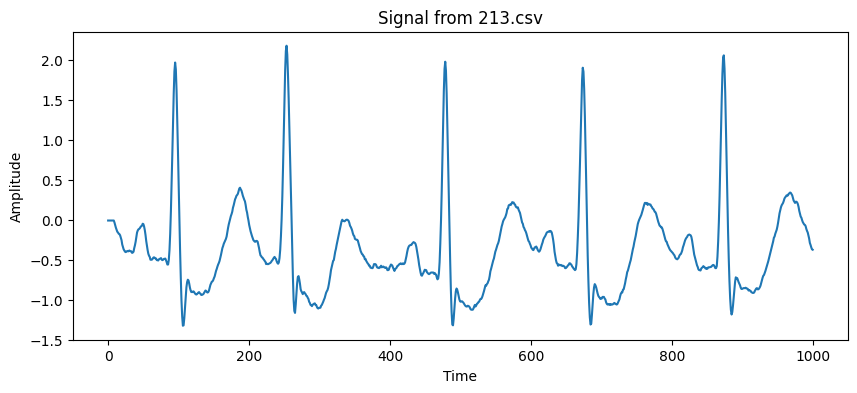

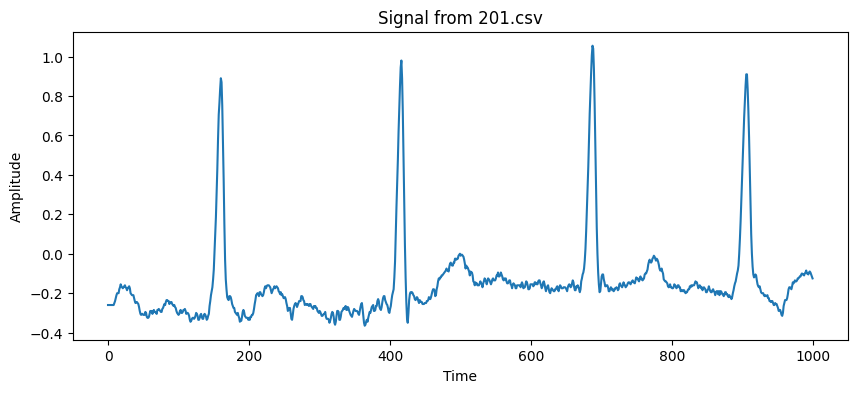

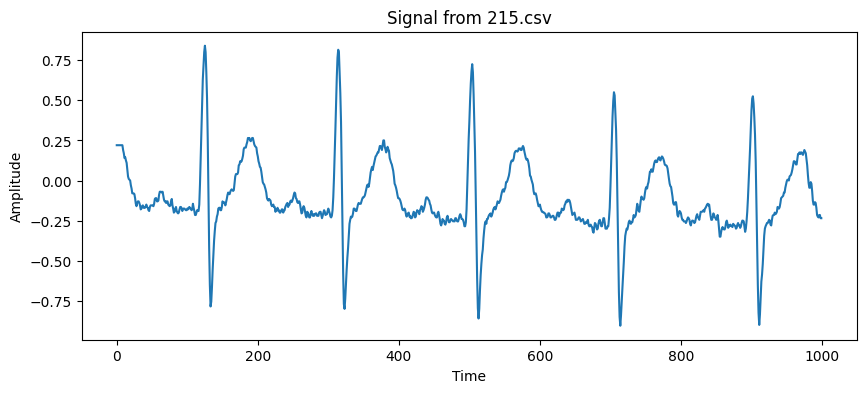

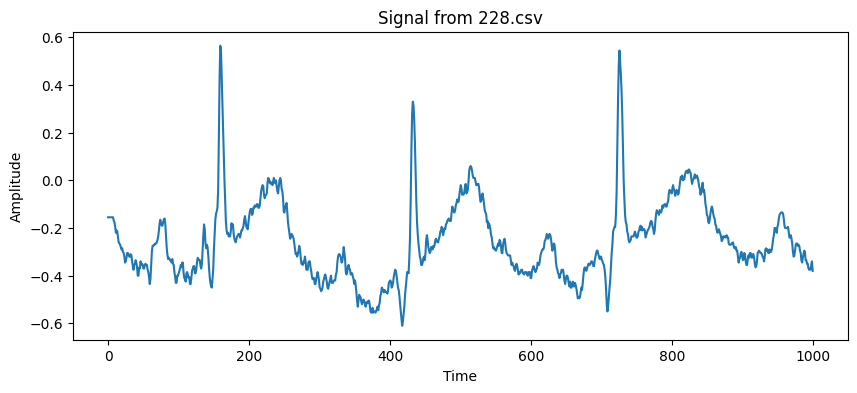

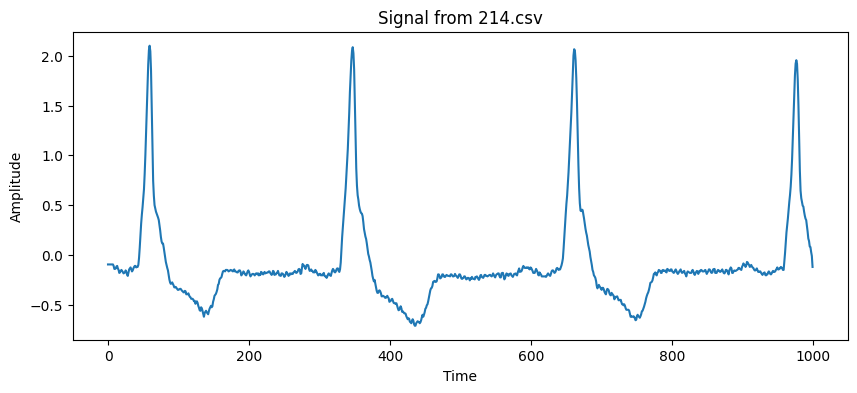

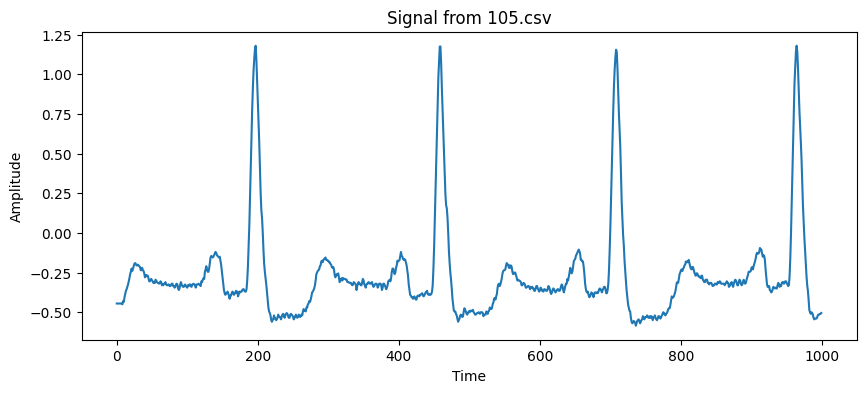

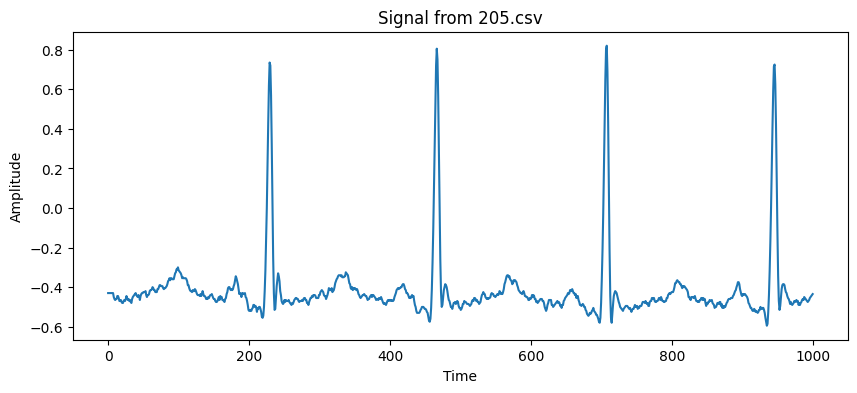

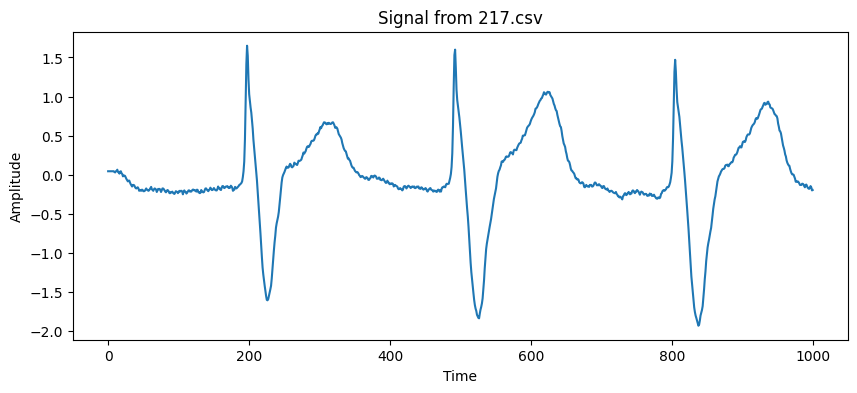

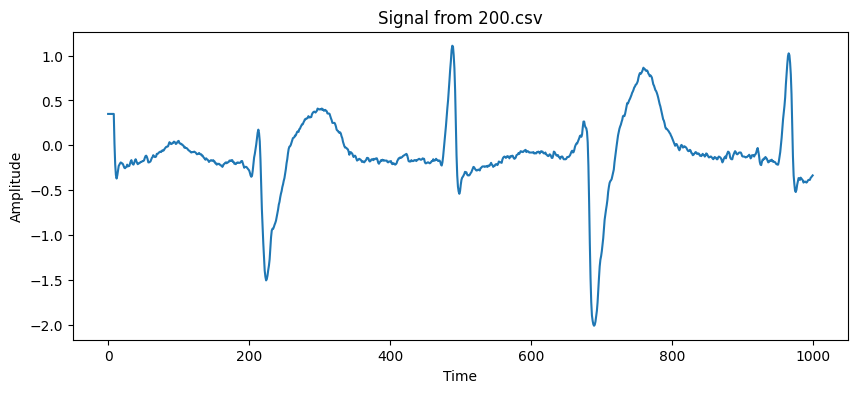

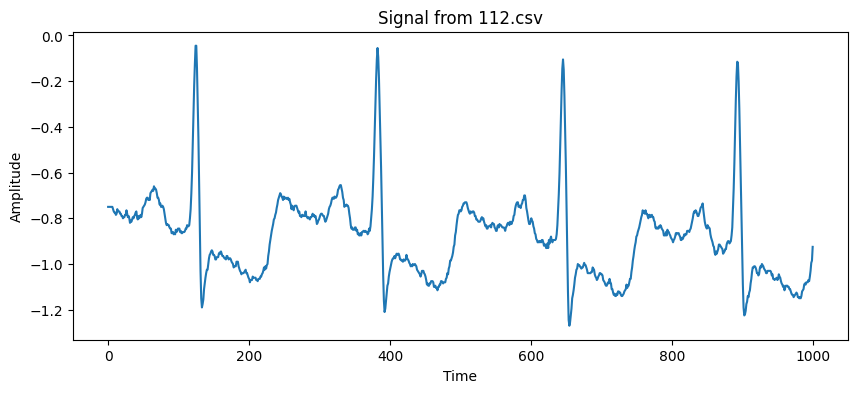

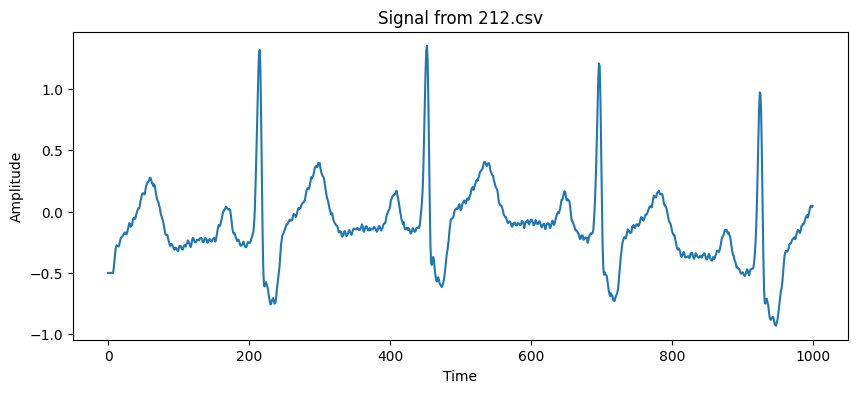

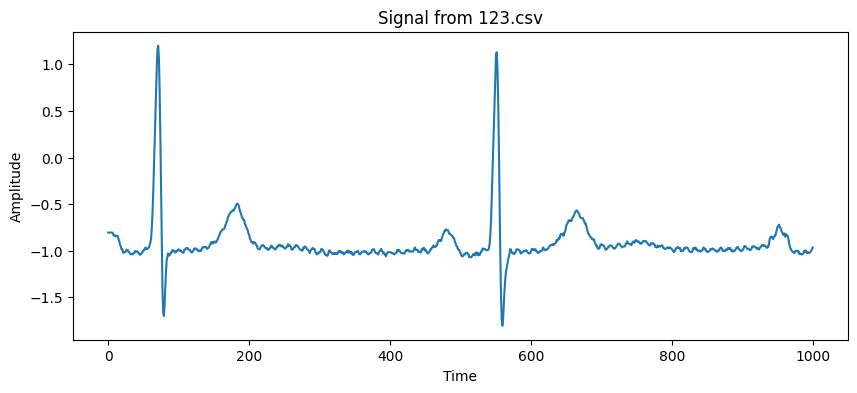

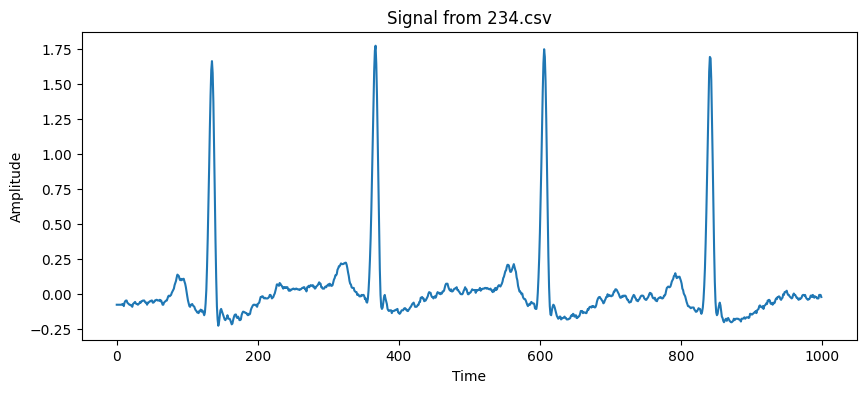

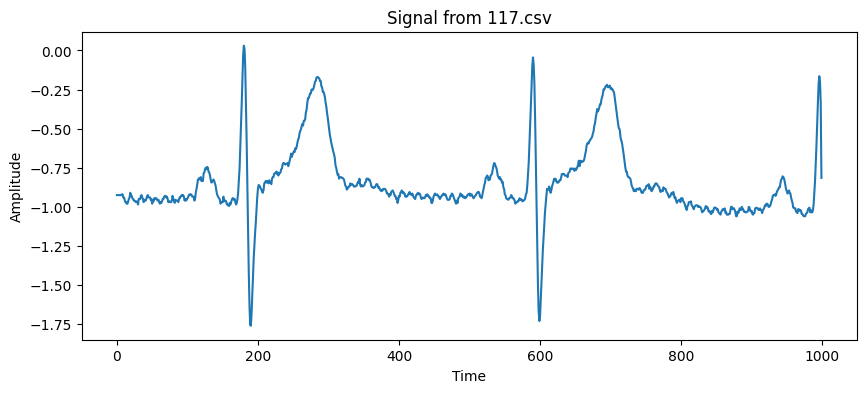

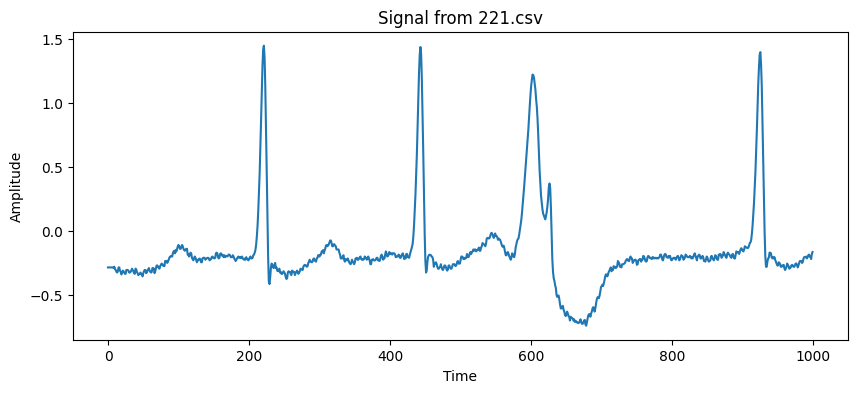

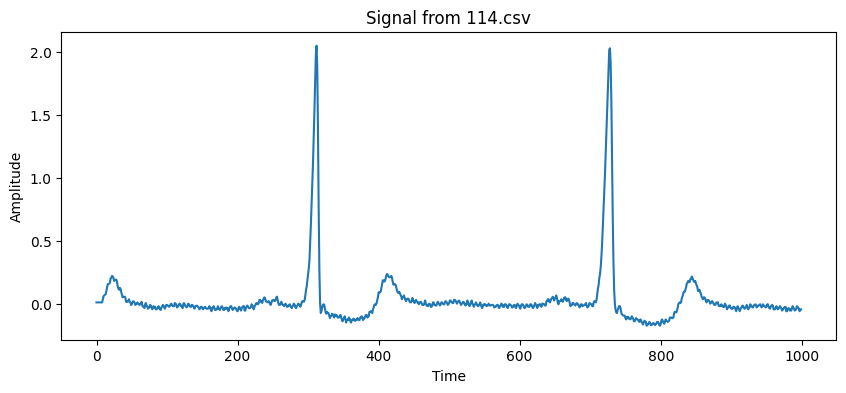

Column 'MLII' not found in 104.csv


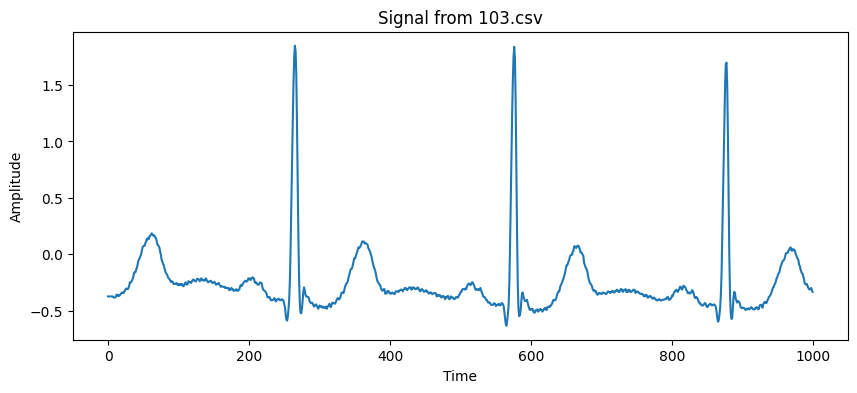

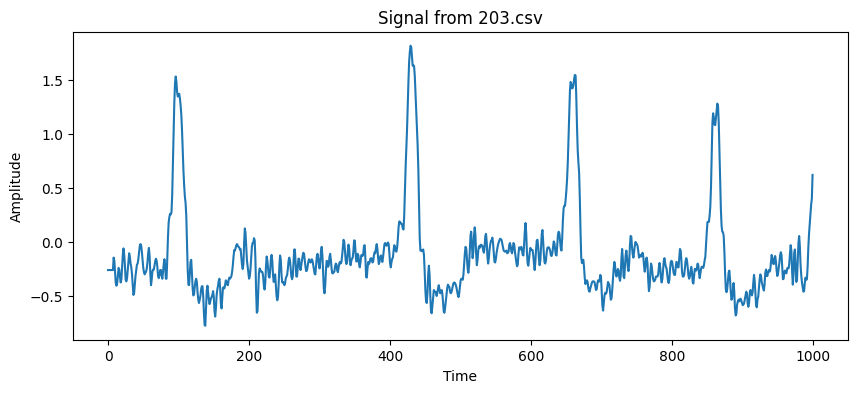

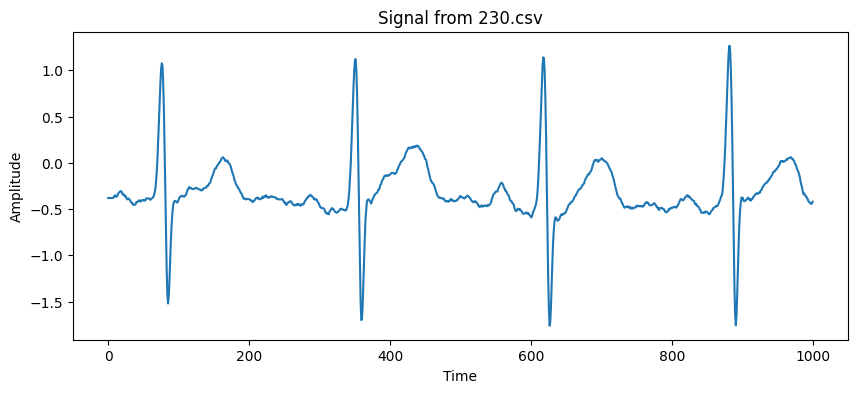

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the dataset folder
dataset_path = "/mnt/data"

# List all CSV files in the directory
file_names = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
print("Files in the dataset folder:", file_names)

# Initialize a dictionary to store data from multiple files
all_data = {}

# Iterate over the file names
for file_name in file_names:
    file_path = os.path.join(dataset_path, file_name)
    try:
        # Load each file
        data = pd.read_csv(file_path)
        all_data[file_name] = data

        # Visualize the signal column for each file
        signal_column = "MLII"  # Replace with the correct column name for your signal
        if signal_column in data.columns:
            plt.figure(figsize=(10, 4))
            plt.plot(data[signal_column][:1000])  # Plot first 1000 samples
            plt.title(f"Signal from {file_name}")
            plt.xlabel("Time")
            plt.ylabel("Amplitude")
            plt.show()
        else:
            print(f"Column '{signal_column}' not found in {file_name}")
    except Exception as e:
        print(f"Error loading or visualizing {file_name}: {e}")




# 2. Standardize the signals

In [ ]:
from scipy.signal import resample

target_length = 1000  # Standard length for all signals
standardized_signals = []

for file_name, data in all_data.items():
    # Check if 'MLII' column exists, skip if not found
    signal_column = "MLII"
    if signal_column not in data.columns:
        print(f"Skipping file {file_name} as it does not have the 'MLII' column.")
        continue

    signal = data[signal_column].values
    resampled_signal = resample(signal, target_length)
    standardized_signals.append(resampled_signal)

Skipping file 102.csv as it does not have the 'MLII' column.
Skipping file 104.csv as it does not have the 'MLII' column.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

normalized_signals = []
for signal in standardized_signals:
    signal = signal.reshape(-1, 1)  # Reshape for MinMaxScaler
    normalized_signal = scaler.fit_transform(signal).flatten()
    normalized_signals.append(normalized_signal)


In [ ]:
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, low_cutoff=0.5, high_cutoff=50, fs=360, order=4):
    nyquist = 0.5 * fs
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Filter each normalized signal
filtered_signals = [bandpass_filter(signal, low_cutoff=0.5, high_cutoff=50, fs=360) for signal in normalized_signals]


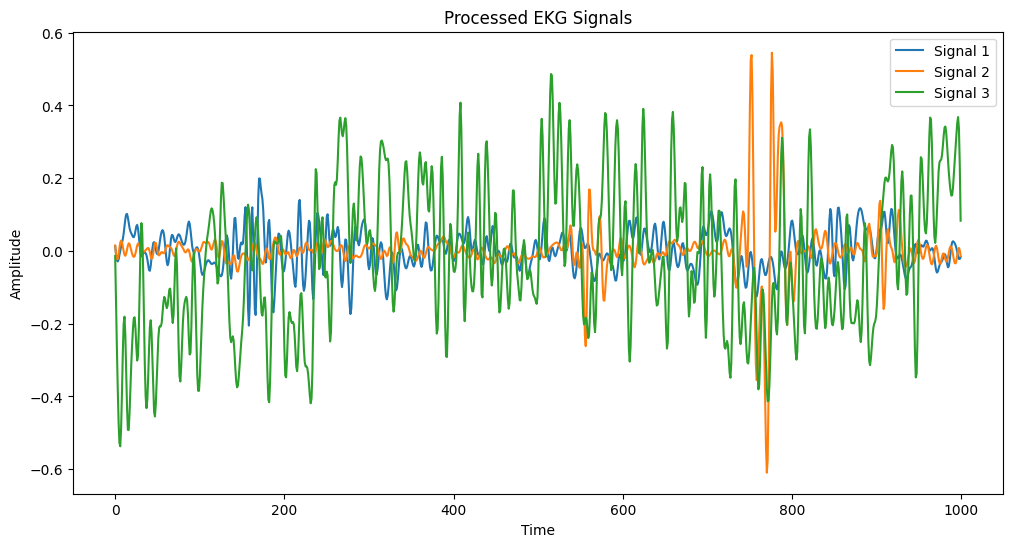

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, signal in enumerate(filtered_signals[:3]):  # Plot the first 3 signals
    plt.plot(signal, label=f"Signal {i+1}")
plt.title("Processed EKG Signals")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [ ]:
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, low_cutoff=0.5, high_cutoff=40, fs=360, order=4):
    """
    Bandpass filter: Removes low-frequency drift and high-frequency noise.
    """
    nyquist = 0.5 * fs
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Apply to each signal
sampling_rate = 360  # Update this based on your dataset
filtered_signals = [bandpass_filter(signal, low_cutoff=0.5, high_cutoff=40, fs=sampling_rate)
                    for signal in standardized_signals]


In [ ]:
import numpy as np

def moving_average(signal, window_size=5):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

# Apply moving average to each filtered signal
smoothed_signals = [moving_average(signal, window_size=5) for signal in filtered_signals]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_signals = [scaler.fit_transform(signal.reshape(-1, 1)).flatten()
                      for signal in smoothed_signals]


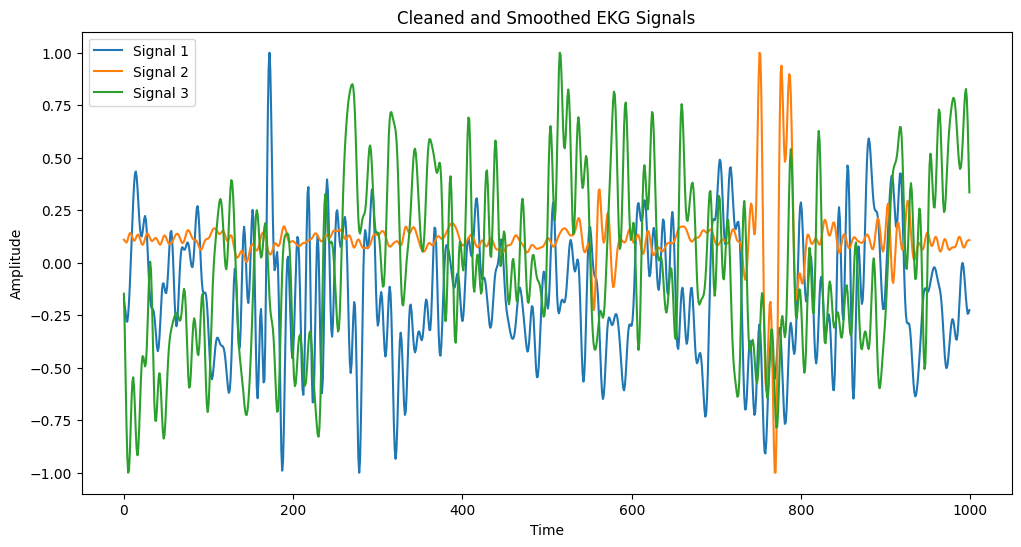

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, signal in enumerate(normalized_signals[:3]):
    plt.plot(signal, label=f"Signal {i+1}")
plt.title("Cleaned and Smoothed EKG Signals")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [ ]:
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, low_cutoff=1.0, high_cutoff=50, fs=360, order=4):
    """
    Refined bandpass filter for EKG signals.
    """
    nyquist = 0.5 * fs
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Apply refined bandpass filter
filtered_signals = [bandpass_filter(signal, low_cutoff=1.0, high_cutoff=50, fs=360)
                    for signal in standardized_signals]


In [ ]:
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter
smoothed_signals = [savgol_filter(signal, window_length=11, polyorder=3) for signal in filtered_signals]


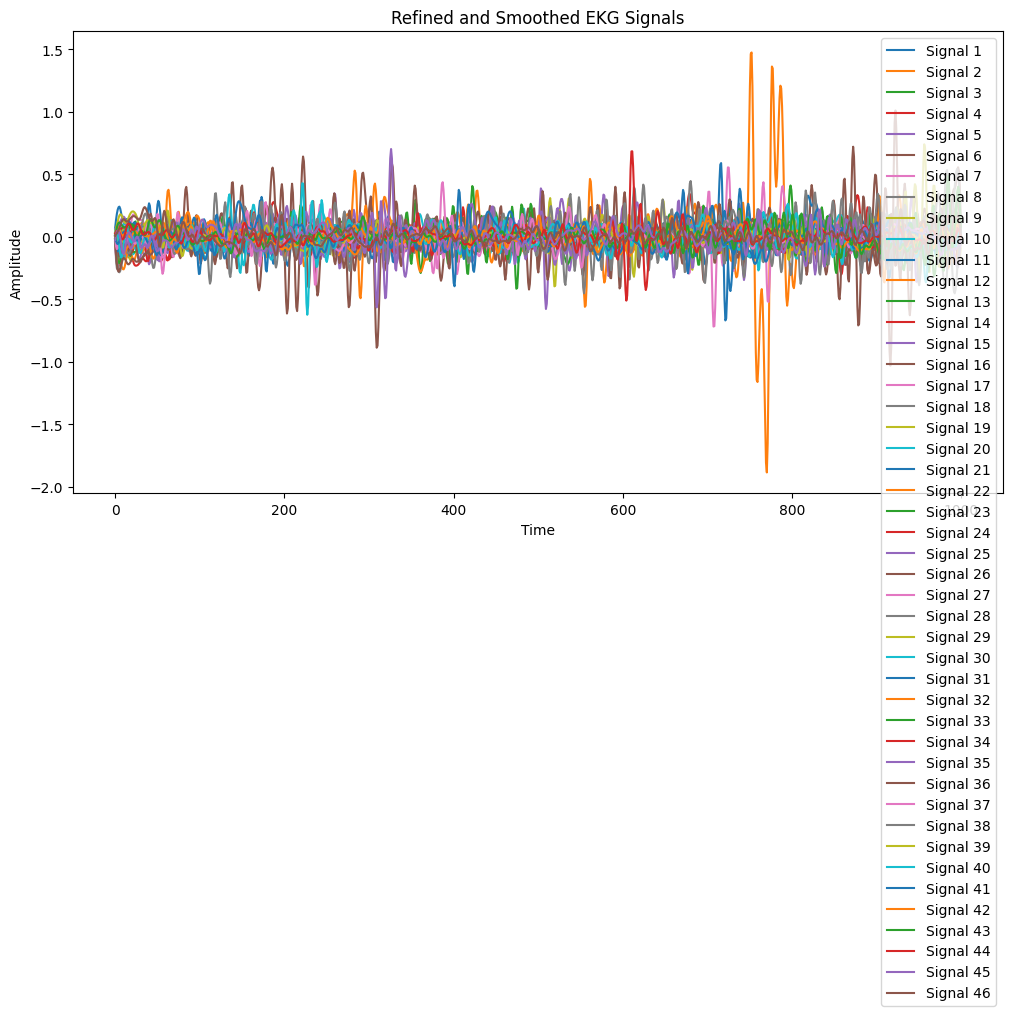

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, signal in enumerate(smoothed_signals[:46]):
    plt.plot(signal, label=f"Signal {i+1}")
plt.title("Refined and Smoothed EKG Signals")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


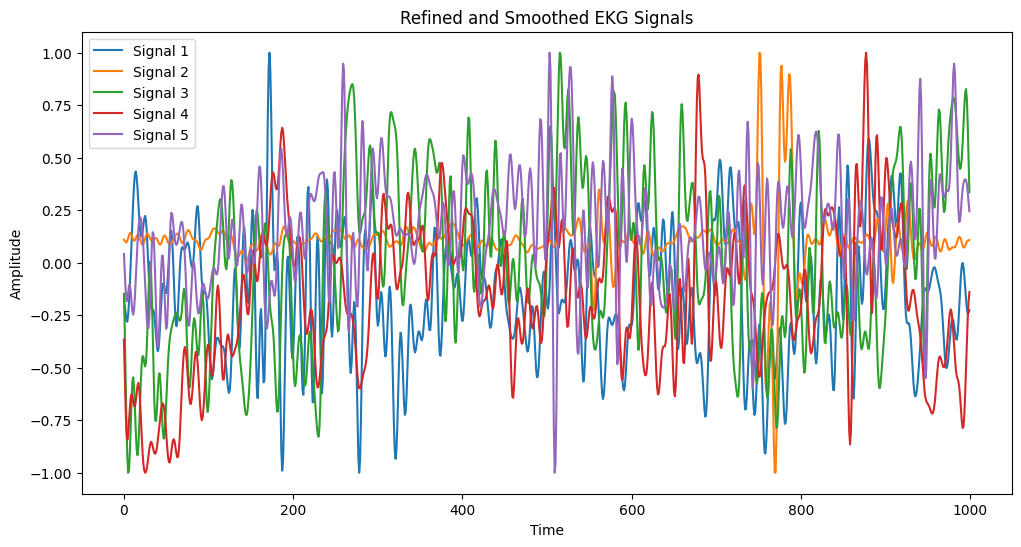

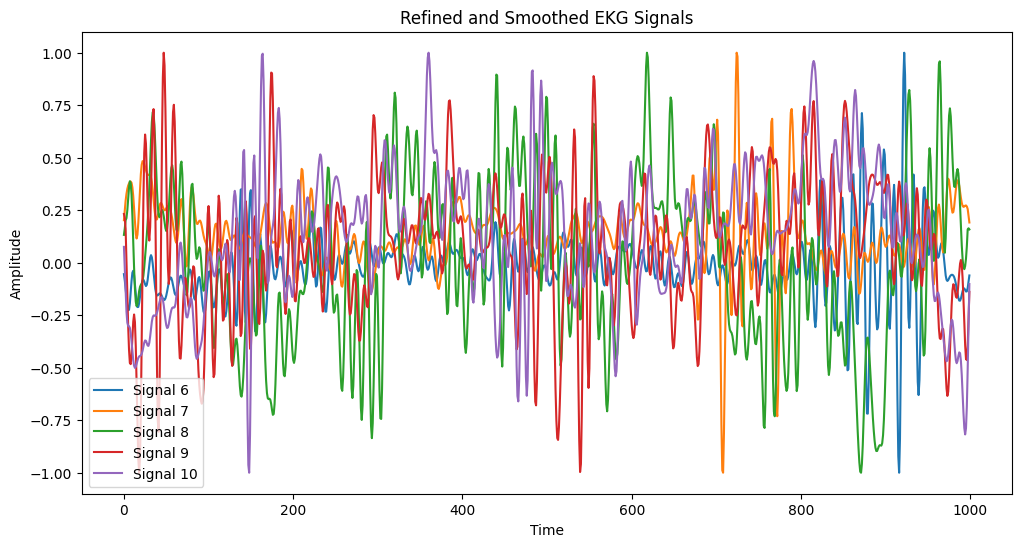

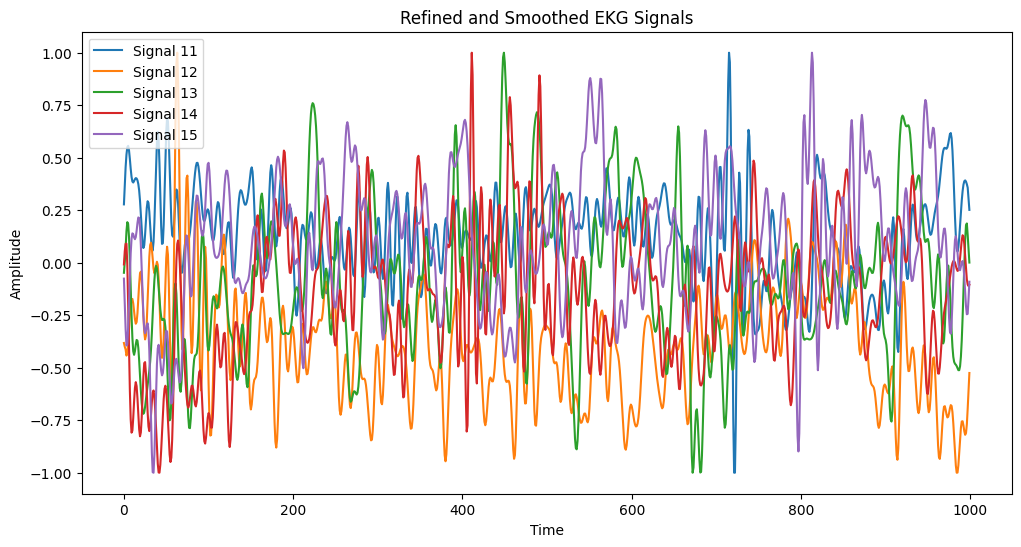

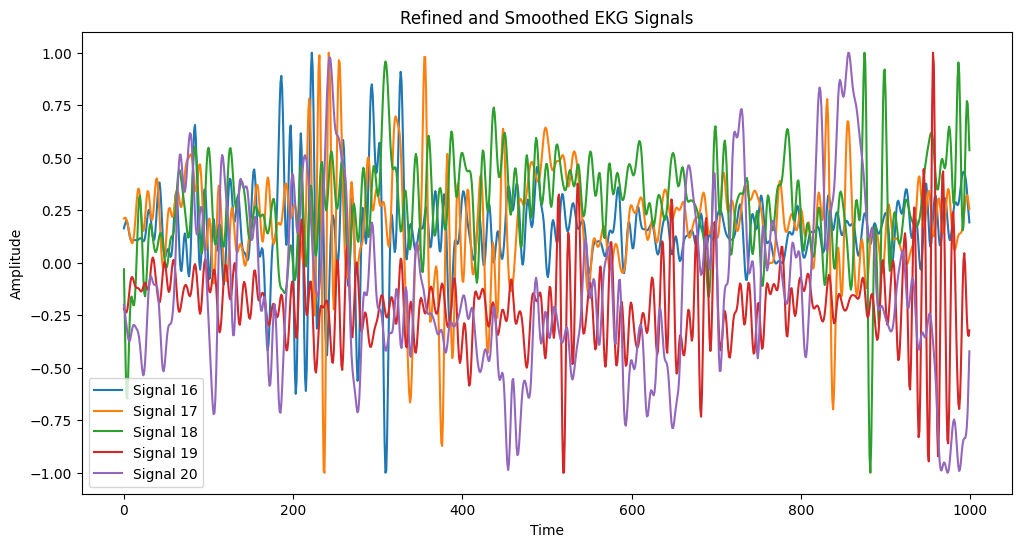

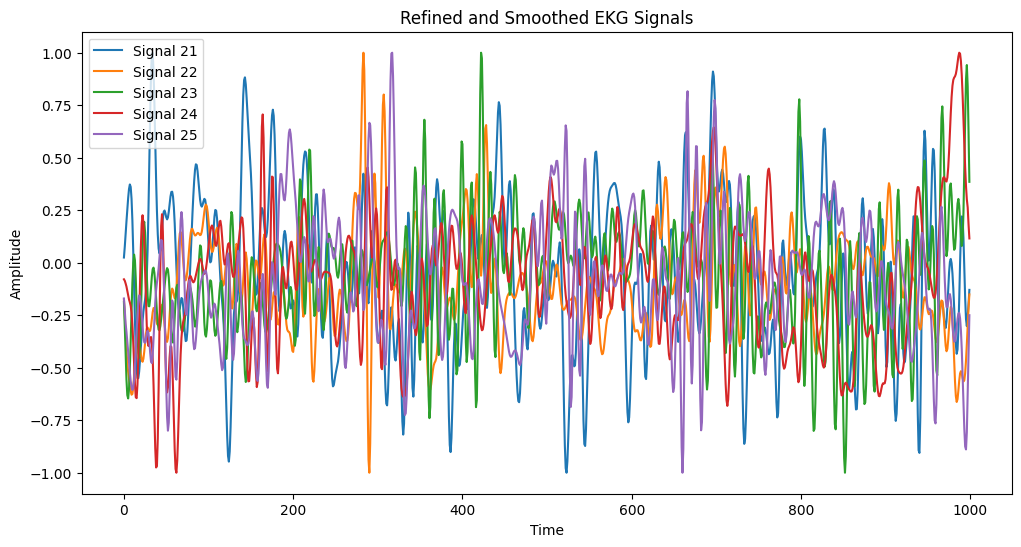

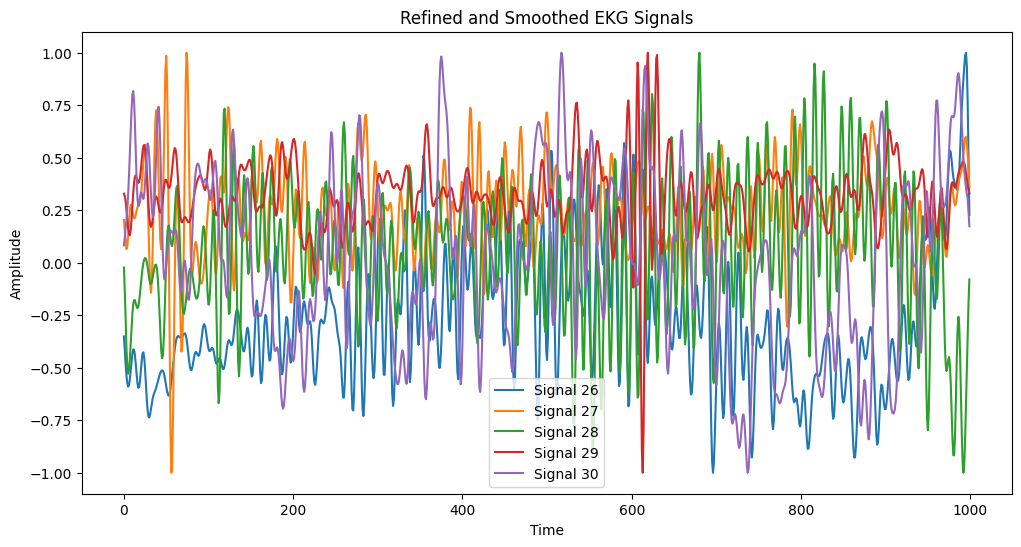

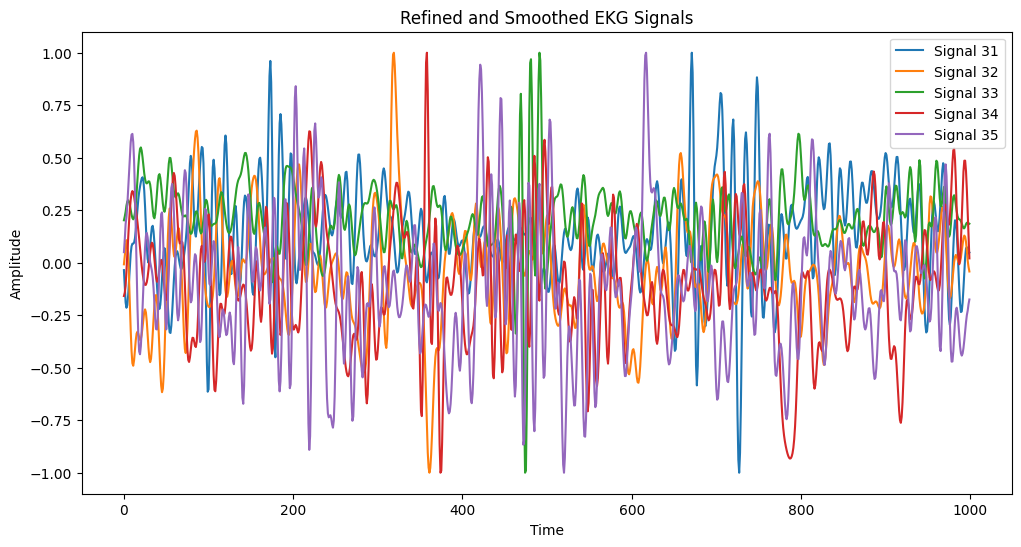

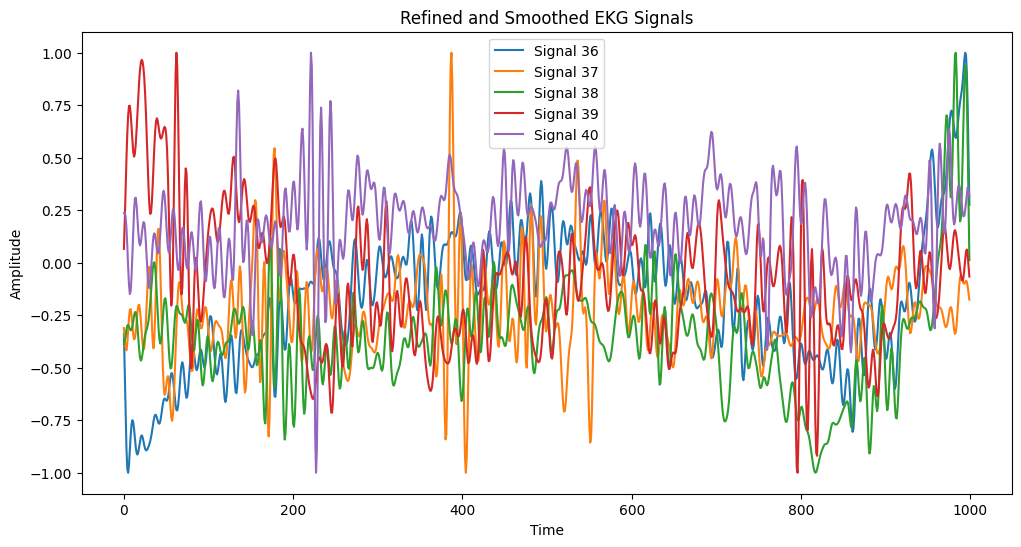

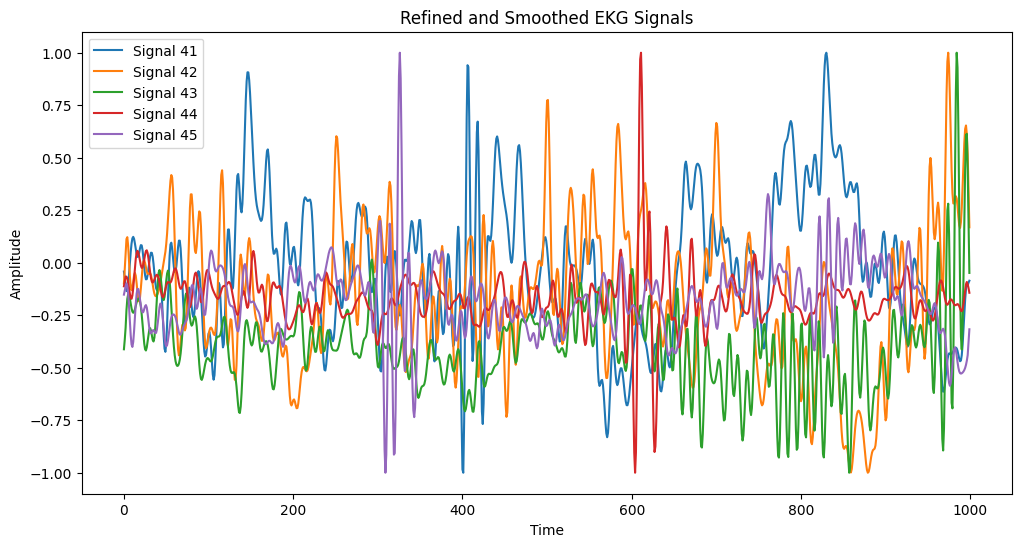

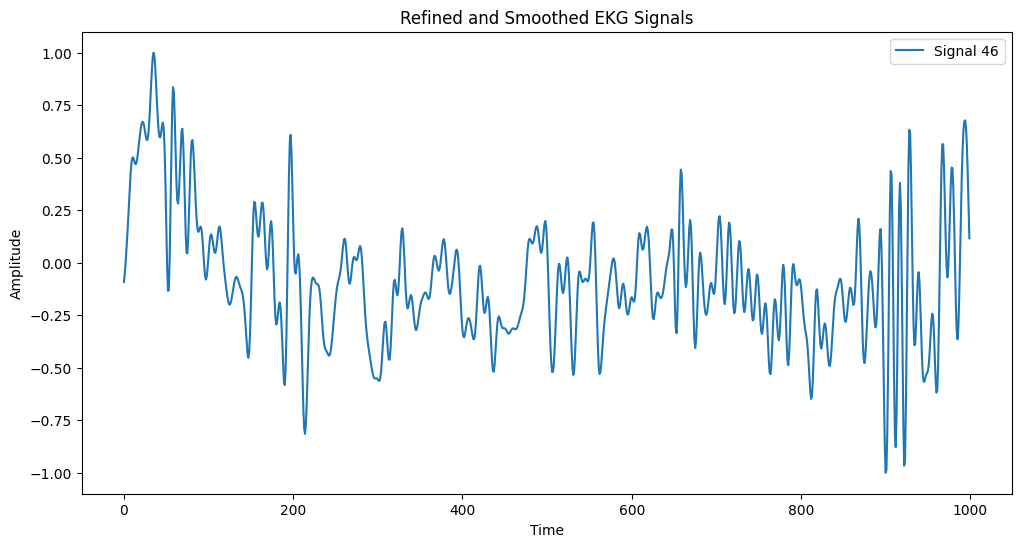

In [ ]:
import matplotlib.pyplot as plt

n_signals = len(normalized_signals)  # Total signals
signals_per_plot = 5  # Adjust for clarity

for i in range(0, n_signals, signals_per_plot):
    plt.figure(figsize=(12, 6))
    for j, signal in enumerate(normalized_signals[i:i+signals_per_plot]):
        plt.plot(signal, label=f"Signal {i+j+1}")
    plt.title("Refined and Smoothed EKG Signals")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


In [ ]:
from scipy.signal import savgol_filter

smoothed_signals = [savgol_filter(signal, window_length=21, polyorder=3) for signal in filtered_signals]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_signals = [scaler.fit_transform(signal.reshape(-1, 1)).flatten() for signal in smoothed_signals]


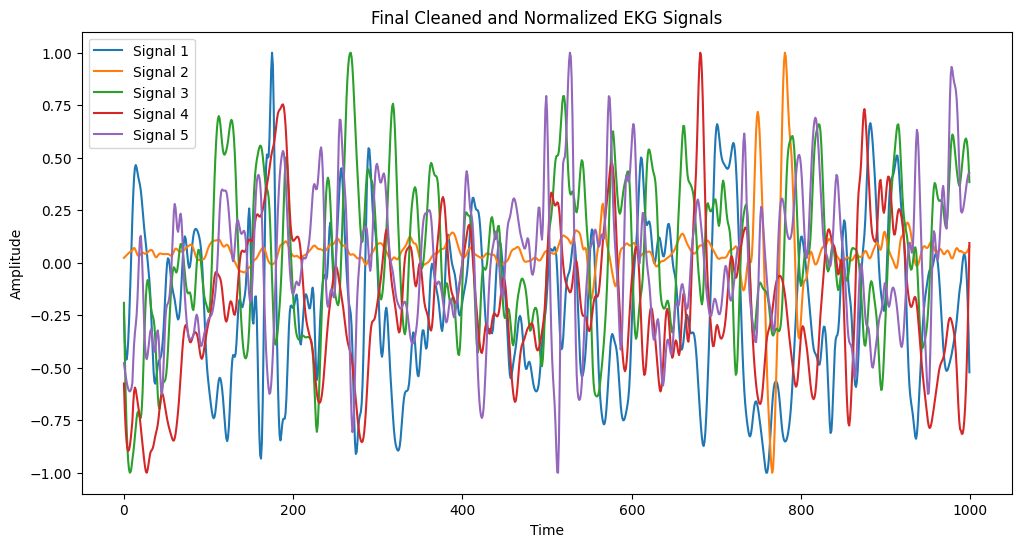

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, signal in enumerate(normalized_signals[:5]):
    plt.plot(signal, label=f"Signal {i+1}")
plt.title("Final Cleaned and Normalized EKG Signals")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


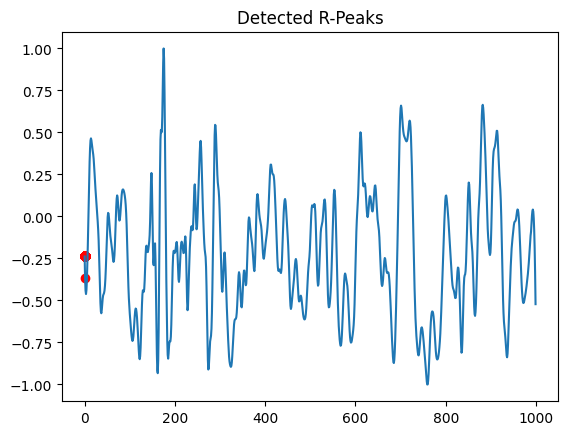

In [ ]:
!pip install neurokit2
import neurokit2 as nk

# Example for one signal
rpeaks, _ = nk.ecg_peaks(normalized_signals[0], sampling_rate=360)
plt.plot(normalized_signals[0])
plt.scatter(rpeaks["ECG_R_Peaks"], normalized_signals[0][rpeaks["ECG_R_Peaks"]], color='red')
plt.title("Detected R-Peaks")
plt.show()


In [ ]:
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, low_cutoff=0.5, high_cutoff=50, fs=360, order=4):
    nyquist = 0.5 * fs
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Filter the signal
filtered_signal = bandpass_filter(normalized_signals[0], low_cutoff=0.5, high_cutoff=50, fs=360)


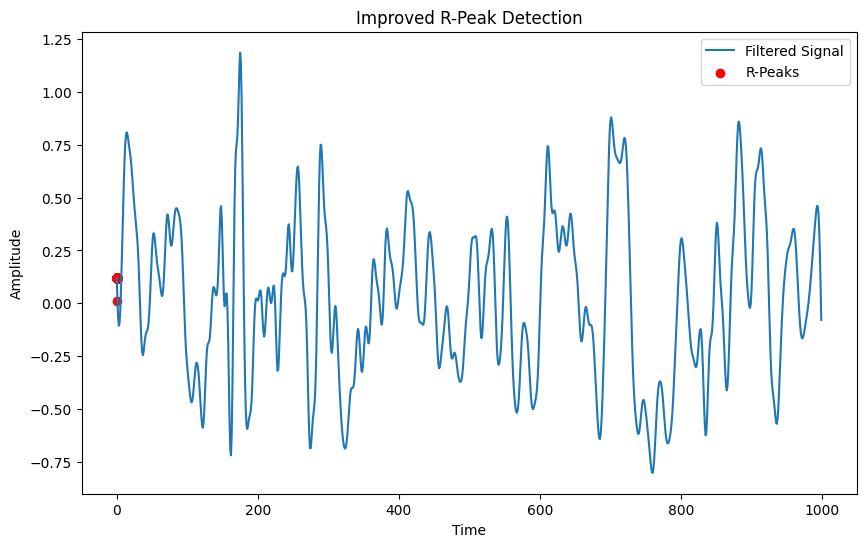

In [ ]:
import neurokit2 as nk
import matplotlib.pyplot as plt

# Detect R-peaks
rpeaks, _ = nk.ecg_peaks(filtered_signal, sampling_rate=360)

# Plot signal and R-peaks
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal, label="Filtered Signal")
plt.scatter(rpeaks["ECG_R_Peaks"], filtered_signal[rpeaks["ECG_R_Peaks"]], color='red', label="R-Peaks")
plt.title("Improved R-Peak Detection")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_signal = scaler.fit_transform(filtered_signal.reshape(-1, 1)).flatten()


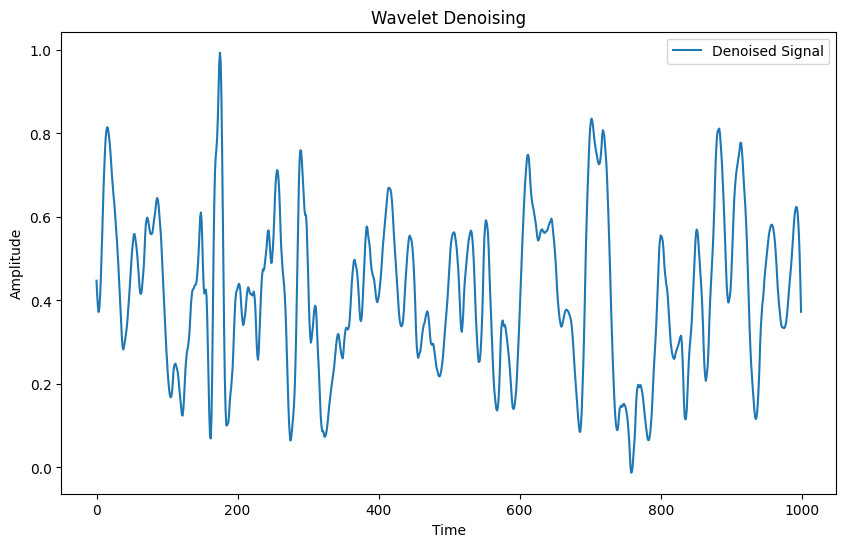

In [ ]:
!pip install PyWavelets
import pywt

def wavelet_denoise(signal, wavelet='db4', level=3):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    coeffs[1:] = [pywt.threshold(c, np.std(c)/2, mode='soft') for c in coeffs[1:]]
    return pywt.waverec(coeffs, wavelet)

# Apply wavelet denoising
denoised_signal = wavelet_denoise(scaled_signal)

plt.figure(figsize=(10, 6))
plt.plot(denoised_signal, label="Denoised Signal")
plt.title("Wavelet Denoising")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


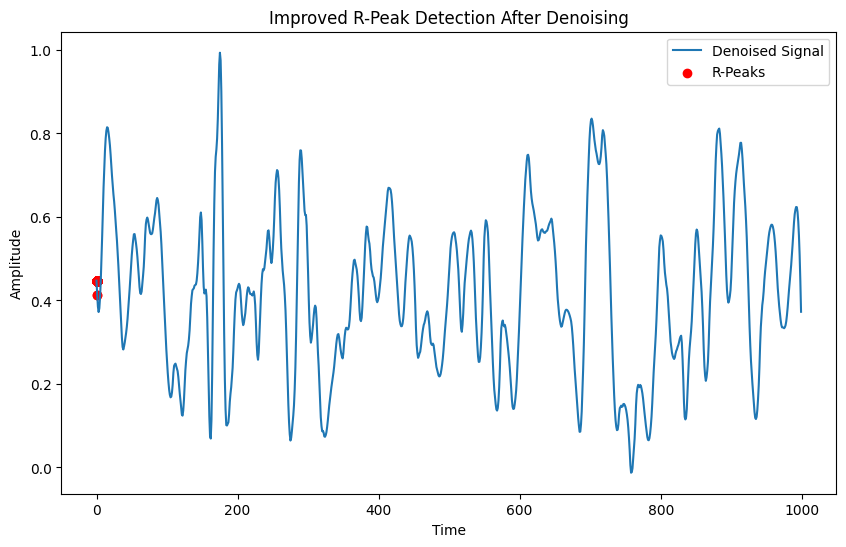

In [ ]:
import neurokit2 as nk
import matplotlib.pyplot as plt

# Detect R-Peaks on denoised signal
rpeaks, info = nk.ecg_peaks(denoised_signal, sampling_rate=360, method="neurokit", correct_artifacts=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(denoised_signal, label="Denoised Signal")
plt.scatter(rpeaks["ECG_R_Peaks"], denoised_signal[rpeaks["ECG_R_Peaks"]], color='red', label="R-Peaks")
plt.title("Improved R-Peak Detection After Denoising")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [ ]:
rpeaks, info = nk.ecg_peaks(denoised_signal, sampling_rate=360, method="pantompkins1985")


/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


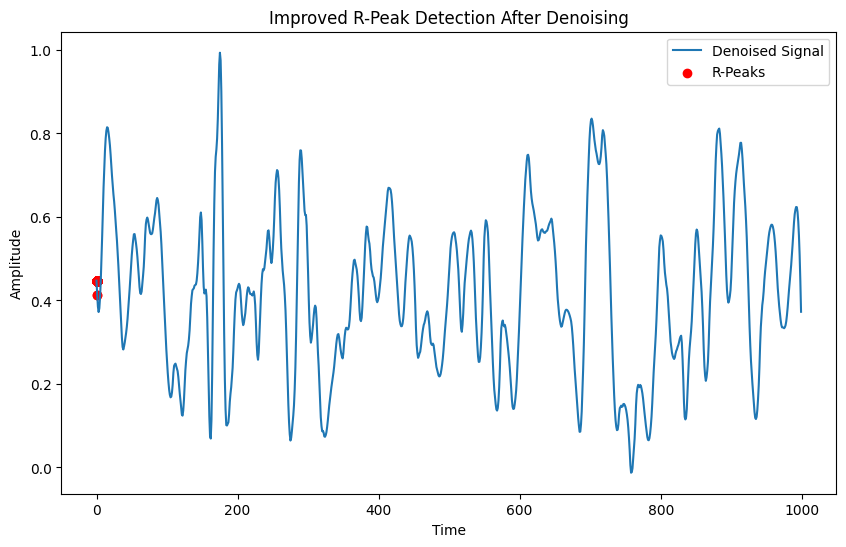

In [ ]:
import neurokit2 as nk
import matplotlib.pyplot as plt

# Detect R-Peaks on denoised signal
rpeaks, info = nk.ecg_peaks(denoised_signal, sampling_rate=360, method="neurokit", correct_artifacts=True)  # Remove threshold argument

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(denoised_signal, label="Denoised Signal")
plt.scatter(rpeaks["ECG_R_Peaks"], denoised_signal[rpeaks["ECG_R_Peaks"]], color='red', label="R-Peaks")
plt.title("Improved R-Peak Detection After Denoising")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

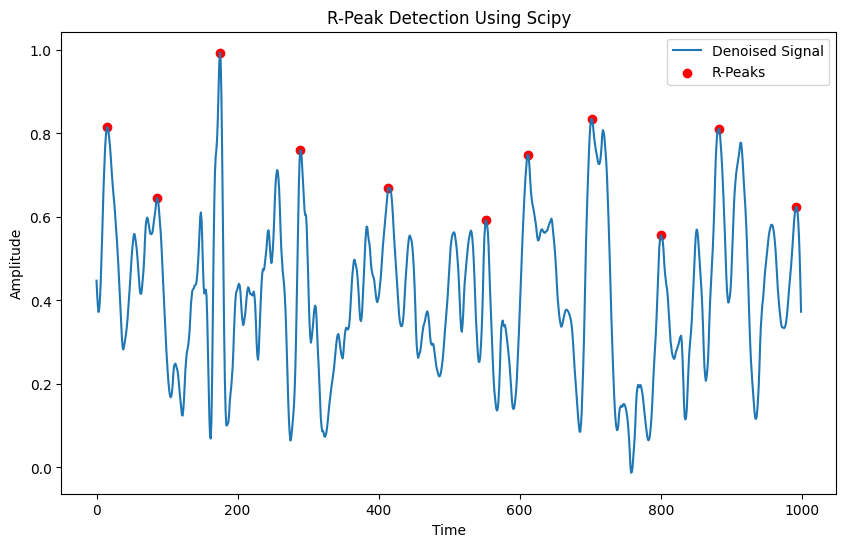

In [ ]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Use scipy to find peaks
peaks, properties = find_peaks(denoised_signal, prominence=0.2, distance=50)

# Plot detected peaks
plt.figure(figsize=(10, 6))
plt.plot(denoised_signal, label="Denoised Signal")
plt.scatter(peaks, denoised_signal[peaks], color='red', label="R-Peaks")
plt.title("R-Peak Detection Using Scipy")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [ ]:
print(f"Number of detected R-peaks: {len(peaks)}")

# Compute RR intervals
rr_intervals = np.diff(peaks) / 360  # Sampling rate = 360 Hz
print("RR Intervals (seconds):", rr_intervals)


Number of detected R-peaks: 11
RR Intervals (seconds): [0.19722222 0.24722222 0.31666667 0.34722222 0.38333333 0.16666667
 0.25       0.27222222 0.23055556 0.30277778]


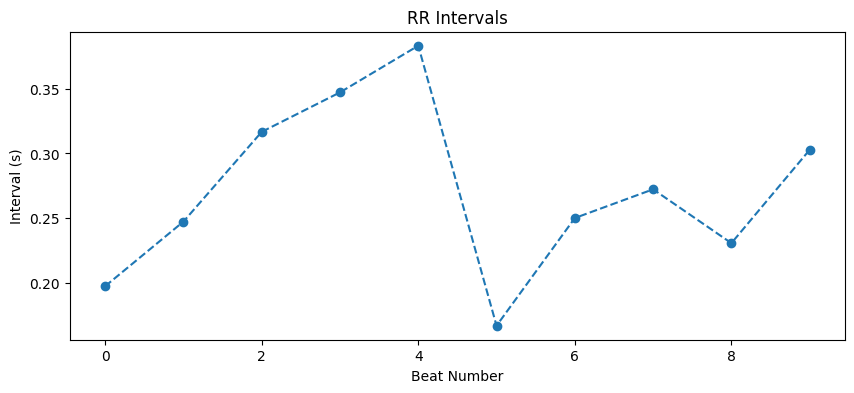

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(rr_intervals, marker='o', linestyle='--')
plt.title("RR Intervals")
plt.xlabel("Beat Number")
plt.ylabel("Interval (s)")
plt.show()


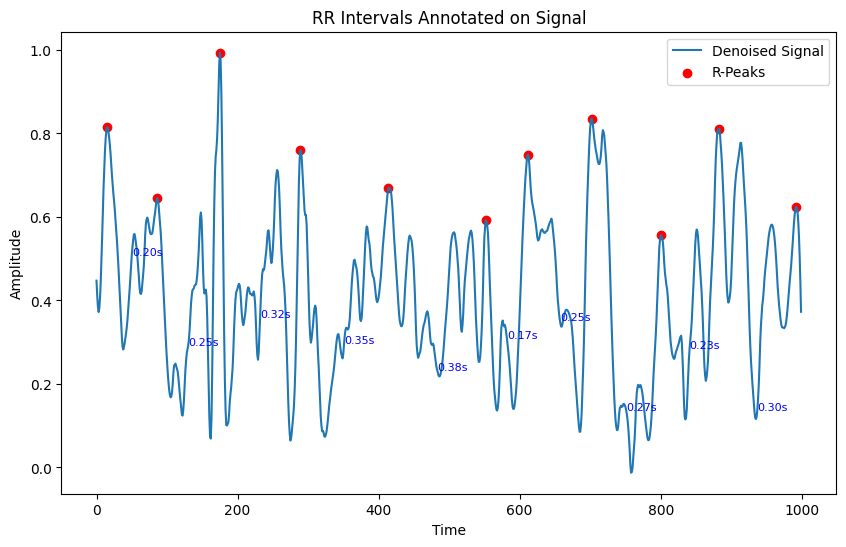

In [ ]:
# Plot original signal with RR intervals
plt.figure(figsize=(10, 6))
plt.plot(denoised_signal, label="Denoised Signal")
plt.scatter(peaks, denoised_signal[peaks], color='red', label="R-Peaks")

# Annotate RR intervals
for i in range(len(peaks) - 1):
    mid = (peaks[i] + peaks[i+1]) // 2
    plt.text(mid, denoised_signal[mid], f"{rr_intervals[i]:.2f}s", color="blue", fontsize=8)

plt.title("RR Intervals Annotated on Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


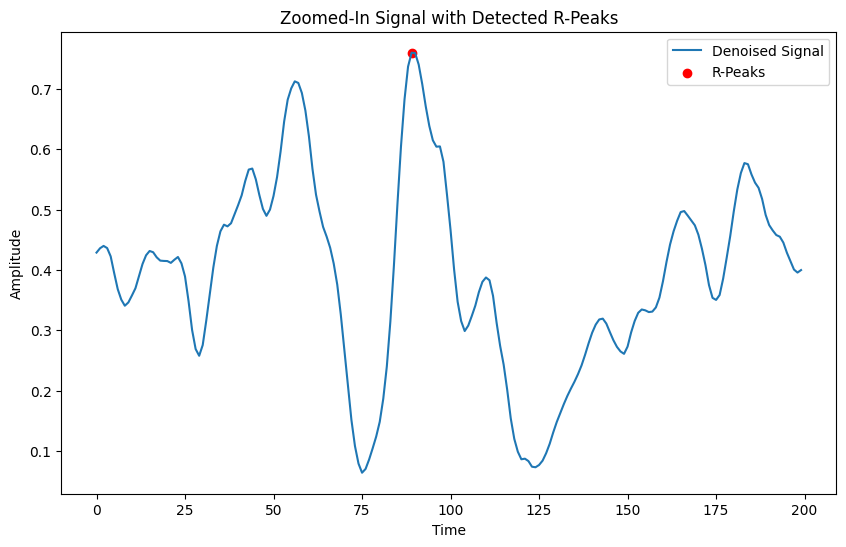

In [ ]:
# Zoom in on a specific range of the signal
start, end = 200, 400  # Adjust range as needed
plt.figure(figsize=(10, 6))
plt.plot(denoised_signal[start:end], label="Denoised Signal")
plt.scatter(peaks[(peaks > start) & (peaks < end)] - start,
            denoised_signal[peaks[(peaks > start) & (peaks < end)]],
            color='red', label="R-Peaks")
plt.title("Zoomed-In Signal with Detected R-Peaks")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


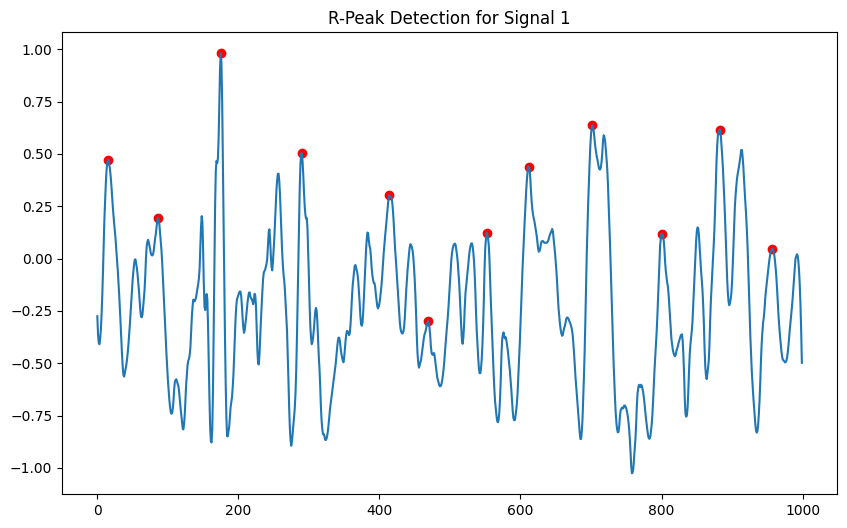

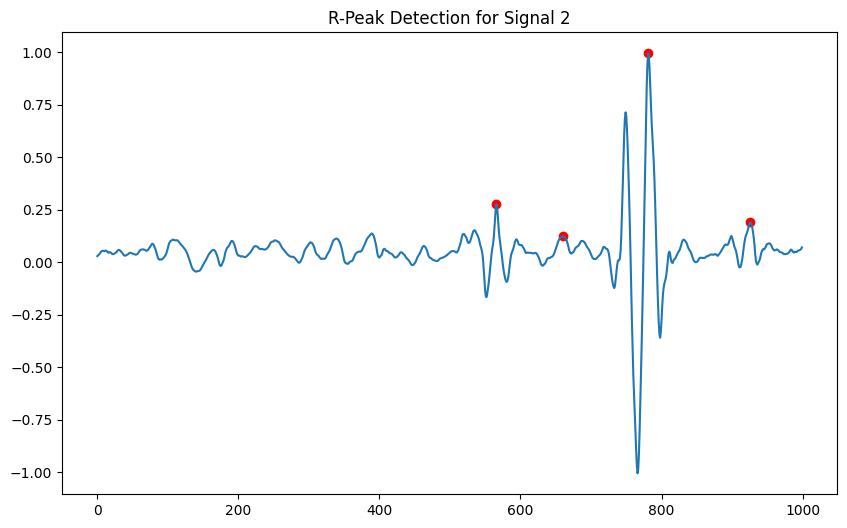

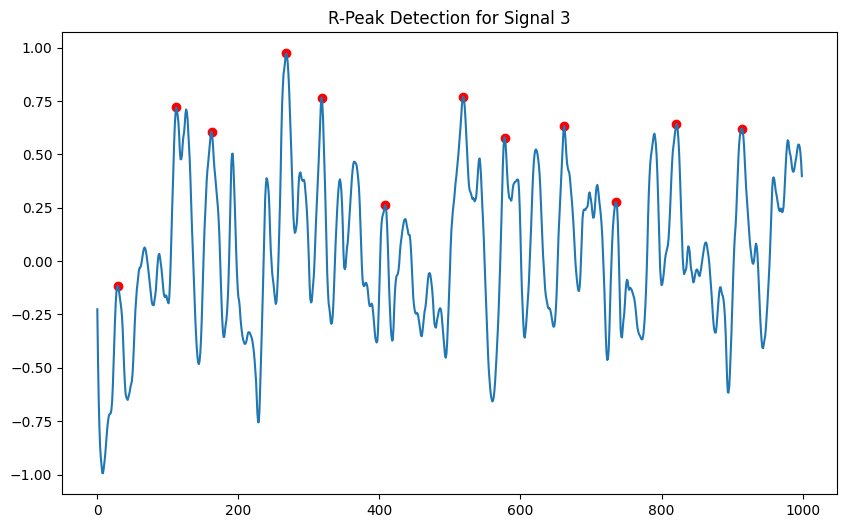

In [ ]:
# Initialize storage for results
all_rr_intervals = []
all_features = []

for i, signal in enumerate(normalized_signals):
    # Denoise the signal
    denoised_signal = wavelet_denoise(signal)

    # Detect R-peaks
    peaks, _ = find_peaks(denoised_signal, prominence=0.2, distance=50)

    # Compute RR intervals
    rr_intervals = np.diff(peaks) / 360  # Sampling rate = 360 Hz
    all_rr_intervals.append(rr_intervals)

    # Compute HRV metrics for this signal
    mean_rr = np.mean(rr_intervals)
    sdnn = np.std(rr_intervals)
    rmssd = np.sqrt(np.mean(np.square(np.diff(rr_intervals))))
    pnn50 = np.sum(np.abs(np.diff(rr_intervals)) > 0.05) / len(rr_intervals) * 100

    # Store features for this signal
    features = {
        "Signal Index": i,
        "Mean RR": mean_rr,
        "SDNN": sdnn,
        "RMSSD": rmssd,
        "pNN50": pnn50,
    }
    all_features.append(features)

    # Optional: Plot the first few signals
    if i < 3:
        plt.figure(figsize=(10, 6))
        plt.plot(denoised_signal)
        plt.scatter(peaks, denoised_signal[peaks], color='red')
        plt.title(f"R-Peak Detection for Signal {i+1}")
        plt.show()

# Convert features to DataFrame
import pandas as pd
features_df = pd.DataFrame(all_features)


In [ ]:
# Save features to a CSV file
features_df.to_csv("ekg_features.csv", index=False)

# Save RR intervals for each signal
rr_intervals_dict = {f"Signal_{i}": rr for i, rr in enumerate(all_rr_intervals)}
np.save("rr_intervals.npy", rr_intervals_dict)

print("Features and RR intervals saved!")


Features and RR intervals saved!


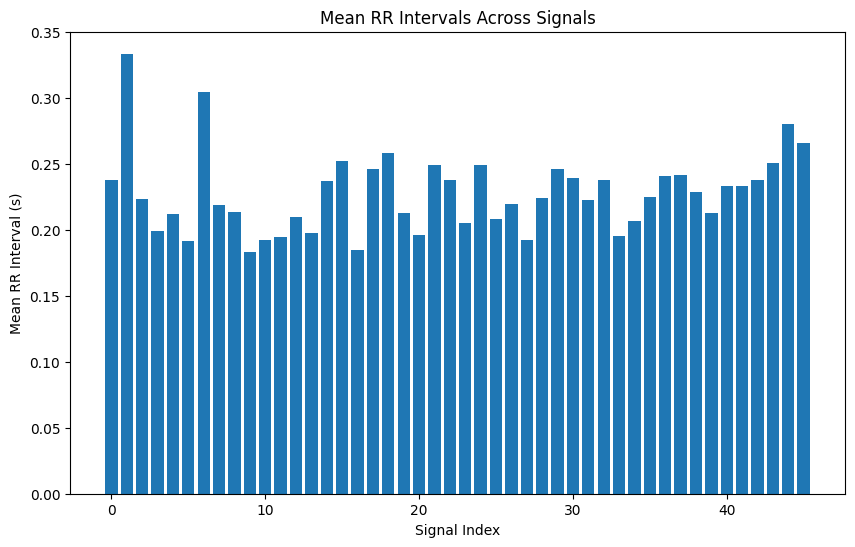

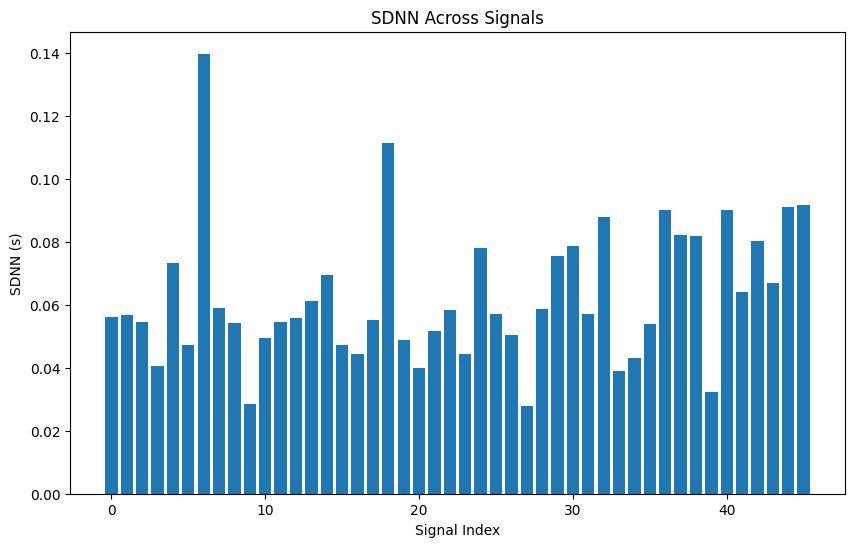

In [ ]:
# Plot Mean RR Intervals for All Signals
plt.figure(figsize=(10, 6))
plt.bar(features_df["Signal Index"], features_df["Mean RR"])
plt.title("Mean RR Intervals Across Signals")
plt.xlabel("Signal Index")
plt.ylabel("Mean RR Interval (s)")
plt.show()

# Plot SDNN Across Signals
plt.figure(figsize=(10, 6))
plt.bar(features_df["Signal Index"], features_df["SDNN"])
plt.title("SDNN Across Signals")
plt.xlabel("Signal Index")
plt.ylabel("SDNN (s)")
plt.show()


## 4. Prepare LSTM Model

In [ ]:
sequence_length = 10  # Length of each sequence
segments = []
labels = []  # Optional if labels are available

for rr_intervals in all_rr_intervals:
    for start in range(0, len(rr_intervals) - sequence_length + 1, sequence_length):
        segment = rr_intervals[start:start + sequence_length]
        segments.append(segment)
        # Example: labels.append(1) if labeled as normal, else 0


In [ ]:
import numpy as np

X = np.array(segments).reshape(len(segments), sequence_length, 1)  # Add feature dimension
print(f"Data shape for LSTM: {X.shape}")


Data shape for LSTM: (42, 10, 1)


In [ ]:
sequence_length = 10  # Length of each sequence
segments = []
labels = []  # Optional if labels are available

for rr_intervals in all_rr_intervals:
    for start in range(0, len(rr_intervals) - sequence_length + 1, sequence_length):
        segment = rr_intervals[start:start + sequence_length]
        segments.append(segment)
        # Example: Assuming you have a way to determine if a segment is normal (1) or abnormal (0)
        # Replace this with your actual logic for assigning labels
        # labels.append(1)  # Example: Label as normal for now

        # Example: Using a simple rule for demonstration
        # You'll need to replace this with your logic
        if np.mean(segment) > 0.8:  # Replace with your condition for abnormal RR intervals
            labels.append(0)  # Abnormal
        else:
            labels.append(1)  # Normal


In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (29, 10, 1)
Validation data shape: (6, 10, 1)
Test data shape: (7, 10, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Define the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input layer with time steps and features
    LSTM(32, return_sequences=True),  # First LSTM layer
    Dropout(0.6),                     # Dropout for regularization
    LSTM(16, return_sequences=False), # Second LSTM layer
    Dense(1, activation='sigmoid')    # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                       │ (None, 10, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,505 (29.32 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)


ValueError: Unrecognized data type: x=[[[0.14444444]
  [0.20555556]
  [0.14722222]
  [0.3       ]
  [0.25833333]
  [0.15      ]
  [0.16944444]
  [0.16666667]
  [0.16111111]
  [0.3       ]]

 [[0.16944444]
  [0.31388889]
  [0.19166667]
  [0.36111111]
  [0.20277778]
  [0.25833333]
  [0.27222222]
  [0.21944444]
  [0.24722222]
  [0.22222222]]

 [[0.39722222]
  [0.14166667]
  [0.25      ]
  [0.18888889]
  [0.26666667]
  [0.13888889]
  [0.36111111]
  [0.15      ]
  [0.36111111]
  [0.18888889]]

 [[0.19722222]
  [0.30555556]
  [0.15833333]
  [0.15833333]
  [0.26111111]
  [0.18888889]
  [0.13888889]
  [0.29166667]
  [0.36388889]
  [0.51666667]]

 [[0.24444444]
  [0.225     ]
  [0.20833333]
  [0.25833333]
  [0.22222222]
  [0.15277778]
  [0.24722222]
  [0.23888889]
  [0.21111111]
  [0.16388889]]

 [[0.29722222]
  [0.14444444]
  [0.27777778]
  [0.15      ]
  [0.17777778]
  [0.14444444]
  [0.28055556]
  [0.425     ]
  [0.22777778]
  [0.20833333]]

 [[0.19722222]
  [0.24722222]
  [0.31944444]
  [0.34444444]
  [0.15277778]
  [0.23055556]
  [0.16666667]
  [0.25      ]
  [0.27222222]
  [0.23055556]]

 [[0.175     ]
  [0.21111111]
  [0.17777778]
  [0.21111111]
  [0.16944444]
  [0.13888889]
  [0.25833333]
  [0.21111111]
  [0.17777778]
  [0.2       ]]

 [[0.31666667]
  [0.20277778]
  [0.25833333]
  [0.15555556]
  [0.18333333]
  [0.18333333]
  [0.31666667]
  [0.21388889]
  [0.2       ]
  [0.15833333]]

 [[0.19166667]
  [0.14722222]
  [0.14166667]
  [0.30833333]
  [0.30833333]
  [0.15833333]
  [0.275     ]
  [0.15      ]
  [0.20833333]
  [0.15      ]]

 [[0.36944444]
  [0.23611111]
  [0.35277778]
  [0.29444444]
  [0.16666667]
  [0.225     ]
  [0.16666667]
  [0.19166667]
  [0.25277778]
  [0.25277778]]

 [[0.23055556]
  [0.13888889]
  [0.29444444]
  [0.13888889]
  [0.25      ]
  [0.30833333]
  [0.16388889]
  [0.23333333]
  [0.20277778]
  [0.23888889]]

 [[0.18055556]
  [0.21944444]
  [0.21944444]
  [0.17777778]
  [0.2       ]
  [0.15277778]
  [0.23055556]
  [0.31944444]
  [0.17777778]
  [0.21388889]]

 [[0.18333333]
  [0.16388889]
  [0.34166667]
  [0.2       ]
  [0.32777778]
  [0.25      ]
  [0.28333333]
  [0.38333333]
  [0.21944444]
  [0.13888889]]

 [[0.26666667]
  [0.21111111]
  [0.17777778]
  [0.16666667]
  [0.18333333]
  [0.2       ]
  [0.16111111]
  [0.19166667]
  [0.29444444]
  [0.14722222]]

 [[0.18611111]
  [0.17777778]
  [0.28888889]
  [0.15833333]
  [0.23055556]
  [0.26944444]
  [0.14444444]
  [0.24722222]
  [0.18888889]
  [0.275     ]]

 [[0.45      ]
  [0.21944444]
  [0.26666667]
  [0.33055556]
  [0.15833333]
  [0.31388889]
  [0.36666667]
  [0.19444444]
  [0.18611111]
  [0.17222222]]

 [[0.16388889]
  [0.18611111]
  [0.18888889]
  [0.41944444]
  [0.15277778]
  [0.18333333]
  [0.20833333]
  [0.21111111]
  [0.15277778]
  [0.23055556]]

 [[0.36944444]
  [0.18888889]
  [0.17777778]
  [0.17777778]
  [0.27222222]
  [0.15      ]
  [0.15      ]
  [0.16111111]
  [0.19444444]
  [0.425     ]]

 [[0.20555556]
  [0.18333333]
  [0.26388889]
  [0.14722222]
  [0.22222222]
  [0.24444444]
  [0.29444444]
  [0.28055556]
  [0.23611111]
  [0.25555556]]

 [[0.39722222]
  [0.26944444]
  [0.27222222]
  [0.18055556]
  [0.24722222]
  [0.16666667]
  [0.18611111]
  [0.20555556]
  [0.39444444]
  [0.14722222]]

 [[0.18888889]
  [0.17777778]
  [0.18611111]
  [0.28333333]
  [0.16111111]
  [0.16944444]
  [0.18333333]
  [0.21111111]
  [0.20555556]
  [0.18055556]]

 [[0.23333333]
  [0.18055556]
  [0.16111111]
  [0.14722222]
  [0.13888889]
  [0.26388889]
  [0.18055556]
  [0.33611111]
  [0.25      ]
  [0.14722222]]

 [[0.15555556]
  [0.15555556]
  [0.19444444]
  [0.18055556]
  [0.26388889]
  [0.18333333]
  [0.19722222]
  [0.19444444]
  [0.18055556]
  [0.13888889]]

 [[0.23611111]
  [0.14722222]
  [0.14444444]
  [0.21666667]
  [0.27222222]
  [0.14444444]
  [0.175     ]
  [0.28055556]
  [0.25      ]
  [0.18055556]]

 [[0.2       ]
  [0.13888889]
  [0.21944444]
  [0.19444444]
  [0.15833333]
  [0.21944444]
  [0.15555556]
  [0.19722222]
  [0.16111111]
  [0.175     ]]

 [[0.32222222]
  [0.16944444]
  [0.18888889]
  [0.17222222]
  [0.17777778]
  [0.13888889]
  [0.17777778]
  [0.21388889]
  [0.19722222]
  [0.18055556]]

 [[0.18888889]
  [0.15      ]
  [0.31388889]
  [0.18055556]
  [0.21666667]
  [0.225     ]
  [0.31944444]
  [0.24722222]
  [0.275     ]
  [0.15833333]]

 [[0.16944444]
  [0.14722222]
  [0.23888889]
  [0.15833333]
  [0.26944444]
  [0.25277778]
  [0.23611111]
  [0.32777778]
  [0.35277778]
  [0.23055556]]] (of type <class 'numpy.ndarray'>)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


ValueError: Unrecognized data type: x=[[[0.29444444]
  [0.175     ]
  [0.23055556]
  [0.15      ]
  [0.225     ]
  [0.41944444]
  [0.2       ]
  [0.25277778]
  [0.25833333]
  [0.18888889]]

 [[0.24444444]
  [0.16388889]
  [0.33611111]
  [0.23888889]
  [0.15555556]
  [0.16666667]
  [0.16111111]
  [0.15555556]
  [0.21388889]
  [0.20833333]]

 [[0.33888889]
  [0.15555556]
  [0.29722222]
  [0.14166667]
  [0.24444444]
  [0.24722222]
  [0.24444444]
  [0.22222222]
  [0.175     ]
  [0.14166667]]

 [[0.23611111]
  [0.19722222]
  [0.14444444]
  [0.16388889]
  [0.23055556]
  [0.18333333]
  [0.20555556]
  [0.225     ]
  [0.26666667]
  [0.13888889]]

 [[0.19166667]
  [0.24722222]
  [0.23888889]
  [0.20555556]
  [0.31111111]
  [0.17777778]
  [0.16944444]
  [0.41388889]
  [0.17777778]
  [0.14166667]]

 [[0.22777778]
  [0.16944444]
  [0.19166667]
  [0.34166667]
  [0.14444444]
  [0.14166667]
  [0.16666667]
  [0.18333333]
  [0.19722222]
  [0.20277778]]

 [[0.27777778]
  [0.31388889]
  [0.29166667]
  [0.24444444]
  [0.25555556]
  [0.15833333]
  [0.31388889]
  [0.23611111]
  [0.23055556]
  [0.19722222]]] (of type <class 'numpy.ndarray'>)

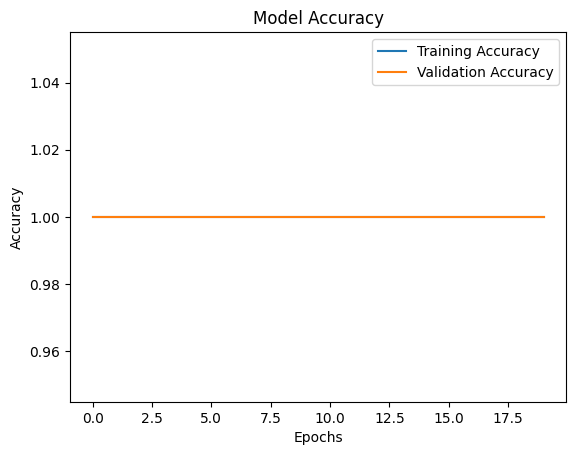

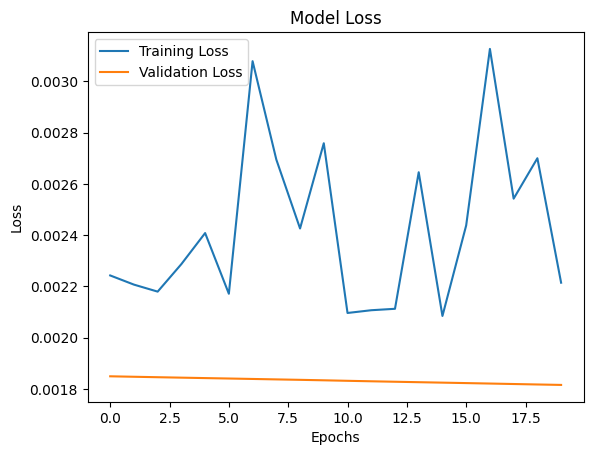

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       7.0

    accuracy                           0.00       7.0
   macro avg       0.00      0.00      0.00       7.0
weighted avg       0.00      0.00      0.00       7.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
print(f"X_train shape: {X_train.shape}, dtype: {type(X_train)}")
print(f"y_train shape: {len(y_train)}, dtype: {type(y_train)}")


X_train shape: (29, 10, 1), dtype: <class 'numpy.ndarray'>
y_train shape: 29, dtype: <class 'list'>


In [ ]:
import numpy as np

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


ValueError: Unrecognized data type: x=[[[0.14444444]
  [0.20555556]
  [0.14722222]
  [0.3       ]
  [0.25833333]
  [0.15      ]
  [0.16944444]
  [0.16666667]
  [0.16111111]
  [0.3       ]]

 [[0.16944444]
  [0.31388889]
  [0.19166667]
  [0.36111111]
  [0.20277778]
  [0.25833333]
  [0.27222222]
  [0.21944444]
  [0.24722222]
  [0.22222222]]

 [[0.39722222]
  [0.14166667]
  [0.25      ]
  [0.18888889]
  [0.26666667]
  [0.13888889]
  [0.36111111]
  [0.15      ]
  [0.36111111]
  [0.18888889]]

 [[0.19722222]
  [0.30555556]
  [0.15833333]
  [0.15833333]
  [0.26111111]
  [0.18888889]
  [0.13888889]
  [0.29166667]
  [0.36388889]
  [0.51666667]]

 [[0.24444444]
  [0.225     ]
  [0.20833333]
  [0.25833333]
  [0.22222222]
  [0.15277778]
  [0.24722222]
  [0.23888889]
  [0.21111111]
  [0.16388889]]

 [[0.29722222]
  [0.14444444]
  [0.27777778]
  [0.15      ]
  [0.17777778]
  [0.14444444]
  [0.28055556]
  [0.425     ]
  [0.22777778]
  [0.20833333]]

 [[0.19722222]
  [0.24722222]
  [0.31944444]
  [0.34444444]
  [0.15277778]
  [0.23055556]
  [0.16666667]
  [0.25      ]
  [0.27222222]
  [0.23055556]]

 [[0.175     ]
  [0.21111111]
  [0.17777778]
  [0.21111111]
  [0.16944444]
  [0.13888889]
  [0.25833333]
  [0.21111111]
  [0.17777778]
  [0.2       ]]

 [[0.31666667]
  [0.20277778]
  [0.25833333]
  [0.15555556]
  [0.18333333]
  [0.18333333]
  [0.31666667]
  [0.21388889]
  [0.2       ]
  [0.15833333]]

 [[0.19166667]
  [0.14722222]
  [0.14166667]
  [0.30833333]
  [0.30833333]
  [0.15833333]
  [0.275     ]
  [0.15      ]
  [0.20833333]
  [0.15      ]]

 [[0.36944444]
  [0.23611111]
  [0.35277778]
  [0.29444444]
  [0.16666667]
  [0.225     ]
  [0.16666667]
  [0.19166667]
  [0.25277778]
  [0.25277778]]

 [[0.23055556]
  [0.13888889]
  [0.29444444]
  [0.13888889]
  [0.25      ]
  [0.30833333]
  [0.16388889]
  [0.23333333]
  [0.20277778]
  [0.23888889]]

 [[0.18055556]
  [0.21944444]
  [0.21944444]
  [0.17777778]
  [0.2       ]
  [0.15277778]
  [0.23055556]
  [0.31944444]
  [0.17777778]
  [0.21388889]]

 [[0.18333333]
  [0.16388889]
  [0.34166667]
  [0.2       ]
  [0.32777778]
  [0.25      ]
  [0.28333333]
  [0.38333333]
  [0.21944444]
  [0.13888889]]

 [[0.26666667]
  [0.21111111]
  [0.17777778]
  [0.16666667]
  [0.18333333]
  [0.2       ]
  [0.16111111]
  [0.19166667]
  [0.29444444]
  [0.14722222]]

 [[0.18611111]
  [0.17777778]
  [0.28888889]
  [0.15833333]
  [0.23055556]
  [0.26944444]
  [0.14444444]
  [0.24722222]
  [0.18888889]
  [0.275     ]]

 [[0.45      ]
  [0.21944444]
  [0.26666667]
  [0.33055556]
  [0.15833333]
  [0.31388889]
  [0.36666667]
  [0.19444444]
  [0.18611111]
  [0.17222222]]

 [[0.16388889]
  [0.18611111]
  [0.18888889]
  [0.41944444]
  [0.15277778]
  [0.18333333]
  [0.20833333]
  [0.21111111]
  [0.15277778]
  [0.23055556]]

 [[0.36944444]
  [0.18888889]
  [0.17777778]
  [0.17777778]
  [0.27222222]
  [0.15      ]
  [0.15      ]
  [0.16111111]
  [0.19444444]
  [0.425     ]]

 [[0.20555556]
  [0.18333333]
  [0.26388889]
  [0.14722222]
  [0.22222222]
  [0.24444444]
  [0.29444444]
  [0.28055556]
  [0.23611111]
  [0.25555556]]

 [[0.39722222]
  [0.26944444]
  [0.27222222]
  [0.18055556]
  [0.24722222]
  [0.16666667]
  [0.18611111]
  [0.20555556]
  [0.39444444]
  [0.14722222]]

 [[0.18888889]
  [0.17777778]
  [0.18611111]
  [0.28333333]
  [0.16111111]
  [0.16944444]
  [0.18333333]
  [0.21111111]
  [0.20555556]
  [0.18055556]]

 [[0.23333333]
  [0.18055556]
  [0.16111111]
  [0.14722222]
  [0.13888889]
  [0.26388889]
  [0.18055556]
  [0.33611111]
  [0.25      ]
  [0.14722222]]

 [[0.15555556]
  [0.15555556]
  [0.19444444]
  [0.18055556]
  [0.26388889]
  [0.18333333]
  [0.19722222]
  [0.19444444]
  [0.18055556]
  [0.13888889]]

 [[0.23611111]
  [0.14722222]
  [0.14444444]
  [0.21666667]
  [0.27222222]
  [0.14444444]
  [0.175     ]
  [0.28055556]
  [0.25      ]
  [0.18055556]]

 [[0.2       ]
  [0.13888889]
  [0.21944444]
  [0.19444444]
  [0.15833333]
  [0.21944444]
  [0.15555556]
  [0.19722222]
  [0.16111111]
  [0.175     ]]

 [[0.32222222]
  [0.16944444]
  [0.18888889]
  [0.17222222]
  [0.17777778]
  [0.13888889]
  [0.17777778]
  [0.21388889]
  [0.19722222]
  [0.18055556]]

 [[0.18888889]
  [0.15      ]
  [0.31388889]
  [0.18055556]
  [0.21666667]
  [0.225     ]
  [0.31944444]
  [0.24722222]
  [0.275     ]
  [0.15833333]]

 [[0.16944444]
  [0.14722222]
  [0.23888889]
  [0.15833333]
  [0.26944444]
  [0.25277778]
  [0.23611111]
  [0.32777778]
  [0.35277778]
  [0.23055556]]] (of type <class 'numpy.ndarray'>)

In [ ]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


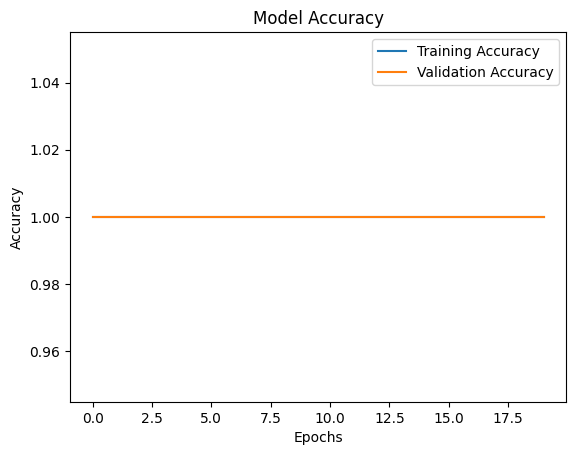

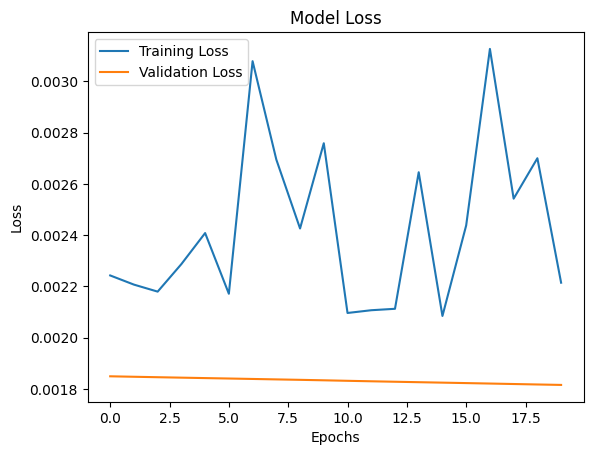

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,  # You can increase this if needed
    batch_size=32,  # Choose a batch size based on your dataset size
    verbose=1  # Show training progress
)


ValueError: Unrecognized data type: x=[[[0.14444444]
  [0.20555556]
  [0.14722222]
  [0.3       ]
  [0.25833333]
  [0.15      ]
  [0.16944444]
  [0.16666667]
  [0.16111111]
  [0.3       ]]

 [[0.16944444]
  [0.31388889]
  [0.19166667]
  [0.36111111]
  [0.20277778]
  [0.25833333]
  [0.27222222]
  [0.21944444]
  [0.24722222]
  [0.22222222]]

 [[0.39722222]
  [0.14166667]
  [0.25      ]
  [0.18888889]
  [0.26666667]
  [0.13888889]
  [0.36111111]
  [0.15      ]
  [0.36111111]
  [0.18888889]]

 [[0.19722222]
  [0.30555556]
  [0.15833333]
  [0.15833333]
  [0.26111111]
  [0.18888889]
  [0.13888889]
  [0.29166667]
  [0.36388889]
  [0.51666667]]

 [[0.24444444]
  [0.225     ]
  [0.20833333]
  [0.25833333]
  [0.22222222]
  [0.15277778]
  [0.24722222]
  [0.23888889]
  [0.21111111]
  [0.16388889]]

 [[0.29722222]
  [0.14444444]
  [0.27777778]
  [0.15      ]
  [0.17777778]
  [0.14444444]
  [0.28055556]
  [0.425     ]
  [0.22777778]
  [0.20833333]]

 [[0.19722222]
  [0.24722222]
  [0.31944444]
  [0.34444444]
  [0.15277778]
  [0.23055556]
  [0.16666667]
  [0.25      ]
  [0.27222222]
  [0.23055556]]

 [[0.175     ]
  [0.21111111]
  [0.17777778]
  [0.21111111]
  [0.16944444]
  [0.13888889]
  [0.25833333]
  [0.21111111]
  [0.17777778]
  [0.2       ]]

 [[0.31666667]
  [0.20277778]
  [0.25833333]
  [0.15555556]
  [0.18333333]
  [0.18333333]
  [0.31666667]
  [0.21388889]
  [0.2       ]
  [0.15833333]]

 [[0.19166667]
  [0.14722222]
  [0.14166667]
  [0.30833333]
  [0.30833333]
  [0.15833333]
  [0.275     ]
  [0.15      ]
  [0.20833333]
  [0.15      ]]

 [[0.36944444]
  [0.23611111]
  [0.35277778]
  [0.29444444]
  [0.16666667]
  [0.225     ]
  [0.16666667]
  [0.19166667]
  [0.25277778]
  [0.25277778]]

 [[0.23055556]
  [0.13888889]
  [0.29444444]
  [0.13888889]
  [0.25      ]
  [0.30833333]
  [0.16388889]
  [0.23333333]
  [0.20277778]
  [0.23888889]]

 [[0.18055556]
  [0.21944444]
  [0.21944444]
  [0.17777778]
  [0.2       ]
  [0.15277778]
  [0.23055556]
  [0.31944444]
  [0.17777778]
  [0.21388889]]

 [[0.18333333]
  [0.16388889]
  [0.34166667]
  [0.2       ]
  [0.32777778]
  [0.25      ]
  [0.28333333]
  [0.38333333]
  [0.21944444]
  [0.13888889]]

 [[0.26666667]
  [0.21111111]
  [0.17777778]
  [0.16666667]
  [0.18333333]
  [0.2       ]
  [0.16111111]
  [0.19166667]
  [0.29444444]
  [0.14722222]]

 [[0.18611111]
  [0.17777778]
  [0.28888889]
  [0.15833333]
  [0.23055556]
  [0.26944444]
  [0.14444444]
  [0.24722222]
  [0.18888889]
  [0.275     ]]

 [[0.45      ]
  [0.21944444]
  [0.26666667]
  [0.33055556]
  [0.15833333]
  [0.31388889]
  [0.36666667]
  [0.19444444]
  [0.18611111]
  [0.17222222]]

 [[0.16388889]
  [0.18611111]
  [0.18888889]
  [0.41944444]
  [0.15277778]
  [0.18333333]
  [0.20833333]
  [0.21111111]
  [0.15277778]
  [0.23055556]]

 [[0.36944444]
  [0.18888889]
  [0.17777778]
  [0.17777778]
  [0.27222222]
  [0.15      ]
  [0.15      ]
  [0.16111111]
  [0.19444444]
  [0.425     ]]

 [[0.20555556]
  [0.18333333]
  [0.26388889]
  [0.14722222]
  [0.22222222]
  [0.24444444]
  [0.29444444]
  [0.28055556]
  [0.23611111]
  [0.25555556]]

 [[0.39722222]
  [0.26944444]
  [0.27222222]
  [0.18055556]
  [0.24722222]
  [0.16666667]
  [0.18611111]
  [0.20555556]
  [0.39444444]
  [0.14722222]]

 [[0.18888889]
  [0.17777778]
  [0.18611111]
  [0.28333333]
  [0.16111111]
  [0.16944444]
  [0.18333333]
  [0.21111111]
  [0.20555556]
  [0.18055556]]

 [[0.23333333]
  [0.18055556]
  [0.16111111]
  [0.14722222]
  [0.13888889]
  [0.26388889]
  [0.18055556]
  [0.33611111]
  [0.25      ]
  [0.14722222]]

 [[0.15555556]
  [0.15555556]
  [0.19444444]
  [0.18055556]
  [0.26388889]
  [0.18333333]
  [0.19722222]
  [0.19444444]
  [0.18055556]
  [0.13888889]]

 [[0.23611111]
  [0.14722222]
  [0.14444444]
  [0.21666667]
  [0.27222222]
  [0.14444444]
  [0.175     ]
  [0.28055556]
  [0.25      ]
  [0.18055556]]

 [[0.2       ]
  [0.13888889]
  [0.21944444]
  [0.19444444]
  [0.15833333]
  [0.21944444]
  [0.15555556]
  [0.19722222]
  [0.16111111]
  [0.175     ]]

 [[0.32222222]
  [0.16944444]
  [0.18888889]
  [0.17222222]
  [0.17777778]
  [0.13888889]
  [0.17777778]
  [0.21388889]
  [0.19722222]
  [0.18055556]]

 [[0.18888889]
  [0.15      ]
  [0.31388889]
  [0.18055556]
  [0.21666667]
  [0.225     ]
  [0.31944444]
  [0.24722222]
  [0.275     ]
  [0.15833333]]

 [[0.16944444]
  [0.14722222]
  [0.23888889]
  [0.15833333]
  [0.26944444]
  [0.25277778]
  [0.23611111]
  [0.32777778]
  [0.35277778]
  [0.23055556]]] (of type <class 'numpy.ndarray'>)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


ValueError: Unrecognized data type: x=[[[0.29444444]
  [0.175     ]
  [0.23055556]
  [0.15      ]
  [0.225     ]
  [0.41944444]
  [0.2       ]
  [0.25277778]
  [0.25833333]
  [0.18888889]]

 [[0.24444444]
  [0.16388889]
  [0.33611111]
  [0.23888889]
  [0.15555556]
  [0.16666667]
  [0.16111111]
  [0.15555556]
  [0.21388889]
  [0.20833333]]

 [[0.33888889]
  [0.15555556]
  [0.29722222]
  [0.14166667]
  [0.24444444]
  [0.24722222]
  [0.24444444]
  [0.22222222]
  [0.175     ]
  [0.14166667]]

 [[0.23611111]
  [0.19722222]
  [0.14444444]
  [0.16388889]
  [0.23055556]
  [0.18333333]
  [0.20555556]
  [0.225     ]
  [0.26666667]
  [0.13888889]]

 [[0.19166667]
  [0.24722222]
  [0.23888889]
  [0.20555556]
  [0.31111111]
  [0.17777778]
  [0.16944444]
  [0.41388889]
  [0.17777778]
  [0.14166667]]

 [[0.22777778]
  [0.16944444]
  [0.19166667]
  [0.34166667]
  [0.14444444]
  [0.14166667]
  [0.16666667]
  [0.18333333]
  [0.19722222]
  [0.20277778]]

 [[0.27777778]
  [0.31388889]
  [0.29166667]
  [0.24444444]
  [0.25555556]
  [0.15833333]
  [0.31388889]
  [0.23611111]
  [0.23055556]
  [0.19722222]]] (of type <class 'numpy.ndarray'>)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions
predictions = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, predictions))

# Print confusion matrix
print(confusion_matrix(y_test, predictions))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       7.0

    accuracy                           0.00       7.0
   macro avg       0.00      0.00      0.00       7.0
weighted avg       0.00      0.00      0.00       7.0

[[0 0]
 [7 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

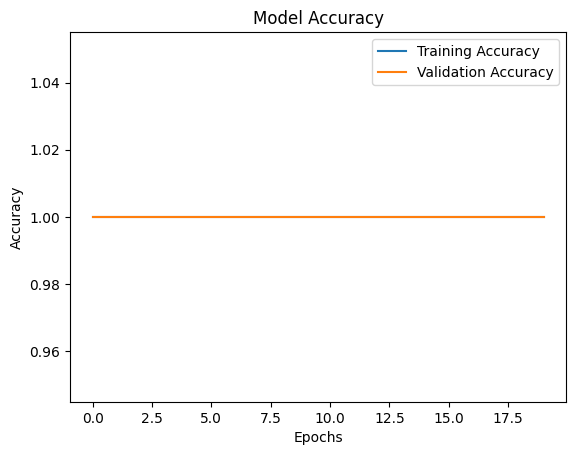

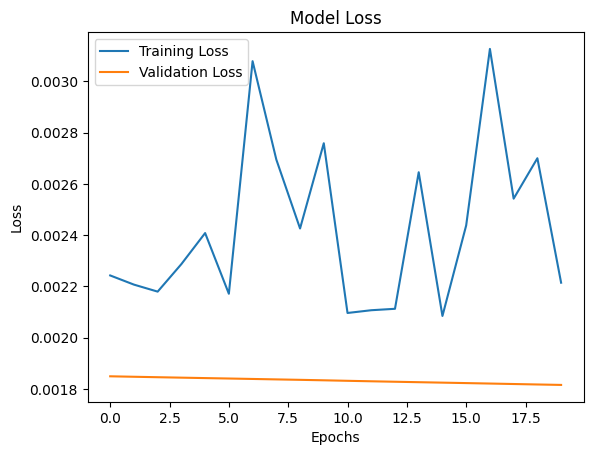

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights for imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: weight for i, weight in enumerate(class_weights)}

# Define a simplified LSTM model with stronger regularization
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input layer with time steps and features
    LSTM(16, return_sequences=False, kernel_regularizer=l2(0.01)),  # Regularized LSTM layer
    Dropout(0.6),  # Higher dropout rate for stronger regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with a reduced learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model summary
model.summary()

# Train the model with class weights
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,  # Handle class imbalance
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                       │ (None, 16)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

ValueError: Unrecognized data type: x=[[[0.14444444]
  [0.20555556]
  [0.14722222]
  [0.3       ]
  [0.25833333]
  [0.15      ]
  [0.16944444]
  [0.16666667]
  [0.16111111]
  [0.3       ]]

 [[0.16944444]
  [0.31388889]
  [0.19166667]
  [0.36111111]
  [0.20277778]
  [0.25833333]
  [0.27222222]
  [0.21944444]
  [0.24722222]
  [0.22222222]]

 [[0.39722222]
  [0.14166667]
  [0.25      ]
  [0.18888889]
  [0.26666667]
  [0.13888889]
  [0.36111111]
  [0.15      ]
  [0.36111111]
  [0.18888889]]

 [[0.19722222]
  [0.30555556]
  [0.15833333]
  [0.15833333]
  [0.26111111]
  [0.18888889]
  [0.13888889]
  [0.29166667]
  [0.36388889]
  [0.51666667]]

 [[0.24444444]
  [0.225     ]
  [0.20833333]
  [0.25833333]
  [0.22222222]
  [0.15277778]
  [0.24722222]
  [0.23888889]
  [0.21111111]
  [0.16388889]]

 [[0.29722222]
  [0.14444444]
  [0.27777778]
  [0.15      ]
  [0.17777778]
  [0.14444444]
  [0.28055556]
  [0.425     ]
  [0.22777778]
  [0.20833333]]

 [[0.19722222]
  [0.24722222]
  [0.31944444]
  [0.34444444]
  [0.15277778]
  [0.23055556]
  [0.16666667]
  [0.25      ]
  [0.27222222]
  [0.23055556]]

 [[0.175     ]
  [0.21111111]
  [0.17777778]
  [0.21111111]
  [0.16944444]
  [0.13888889]
  [0.25833333]
  [0.21111111]
  [0.17777778]
  [0.2       ]]

 [[0.31666667]
  [0.20277778]
  [0.25833333]
  [0.15555556]
  [0.18333333]
  [0.18333333]
  [0.31666667]
  [0.21388889]
  [0.2       ]
  [0.15833333]]

 [[0.19166667]
  [0.14722222]
  [0.14166667]
  [0.30833333]
  [0.30833333]
  [0.15833333]
  [0.275     ]
  [0.15      ]
  [0.20833333]
  [0.15      ]]

 [[0.36944444]
  [0.23611111]
  [0.35277778]
  [0.29444444]
  [0.16666667]
  [0.225     ]
  [0.16666667]
  [0.19166667]
  [0.25277778]
  [0.25277778]]

 [[0.23055556]
  [0.13888889]
  [0.29444444]
  [0.13888889]
  [0.25      ]
  [0.30833333]
  [0.16388889]
  [0.23333333]
  [0.20277778]
  [0.23888889]]

 [[0.18055556]
  [0.21944444]
  [0.21944444]
  [0.17777778]
  [0.2       ]
  [0.15277778]
  [0.23055556]
  [0.31944444]
  [0.17777778]
  [0.21388889]]

 [[0.18333333]
  [0.16388889]
  [0.34166667]
  [0.2       ]
  [0.32777778]
  [0.25      ]
  [0.28333333]
  [0.38333333]
  [0.21944444]
  [0.13888889]]

 [[0.26666667]
  [0.21111111]
  [0.17777778]
  [0.16666667]
  [0.18333333]
  [0.2       ]
  [0.16111111]
  [0.19166667]
  [0.29444444]
  [0.14722222]]

 [[0.18611111]
  [0.17777778]
  [0.28888889]
  [0.15833333]
  [0.23055556]
  [0.26944444]
  [0.14444444]
  [0.24722222]
  [0.18888889]
  [0.275     ]]

 [[0.45      ]
  [0.21944444]
  [0.26666667]
  [0.33055556]
  [0.15833333]
  [0.31388889]
  [0.36666667]
  [0.19444444]
  [0.18611111]
  [0.17222222]]

 [[0.16388889]
  [0.18611111]
  [0.18888889]
  [0.41944444]
  [0.15277778]
  [0.18333333]
  [0.20833333]
  [0.21111111]
  [0.15277778]
  [0.23055556]]

 [[0.36944444]
  [0.18888889]
  [0.17777778]
  [0.17777778]
  [0.27222222]
  [0.15      ]
  [0.15      ]
  [0.16111111]
  [0.19444444]
  [0.425     ]]

 [[0.20555556]
  [0.18333333]
  [0.26388889]
  [0.14722222]
  [0.22222222]
  [0.24444444]
  [0.29444444]
  [0.28055556]
  [0.23611111]
  [0.25555556]]

 [[0.39722222]
  [0.26944444]
  [0.27222222]
  [0.18055556]
  [0.24722222]
  [0.16666667]
  [0.18611111]
  [0.20555556]
  [0.39444444]
  [0.14722222]]

 [[0.18888889]
  [0.17777778]
  [0.18611111]
  [0.28333333]
  [0.16111111]
  [0.16944444]
  [0.18333333]
  [0.21111111]
  [0.20555556]
  [0.18055556]]

 [[0.23333333]
  [0.18055556]
  [0.16111111]
  [0.14722222]
  [0.13888889]
  [0.26388889]
  [0.18055556]
  [0.33611111]
  [0.25      ]
  [0.14722222]]

 [[0.15555556]
  [0.15555556]
  [0.19444444]
  [0.18055556]
  [0.26388889]
  [0.18333333]
  [0.19722222]
  [0.19444444]
  [0.18055556]
  [0.13888889]]

 [[0.23611111]
  [0.14722222]
  [0.14444444]
  [0.21666667]
  [0.27222222]
  [0.14444444]
  [0.175     ]
  [0.28055556]
  [0.25      ]
  [0.18055556]]

 [[0.2       ]
  [0.13888889]
  [0.21944444]
  [0.19444444]
  [0.15833333]
  [0.21944444]
  [0.15555556]
  [0.19722222]
  [0.16111111]
  [0.175     ]]

 [[0.32222222]
  [0.16944444]
  [0.18888889]
  [0.17222222]
  [0.17777778]
  [0.13888889]
  [0.17777778]
  [0.21388889]
  [0.19722222]
  [0.18055556]]

 [[0.18888889]
  [0.15      ]
  [0.31388889]
  [0.18055556]
  [0.21666667]
  [0.225     ]
  [0.31944444]
  [0.24722222]
  [0.275     ]
  [0.15833333]]

 [[0.16944444]
  [0.14722222]
  [0.23888889]
  [0.15833333]
  [0.26944444]
  [0.25277778]
  [0.23611111]
  [0.32777778]
  [0.35277778]
  [0.23055556]]] (of type <class 'numpy.ndarray'>)

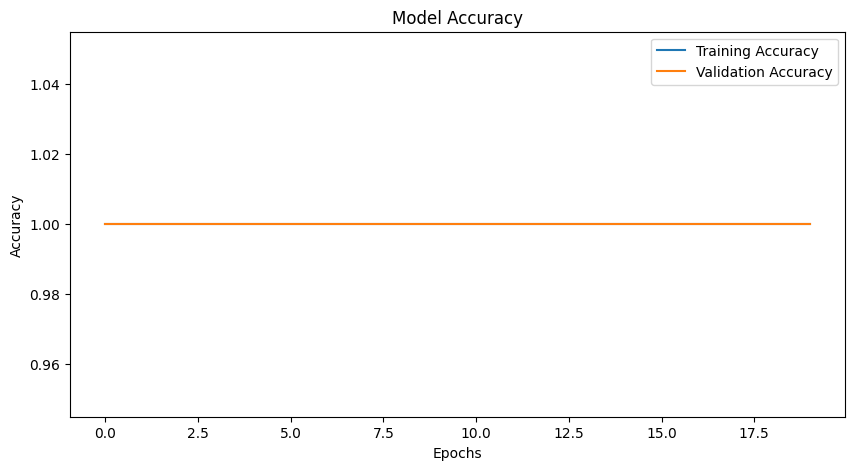

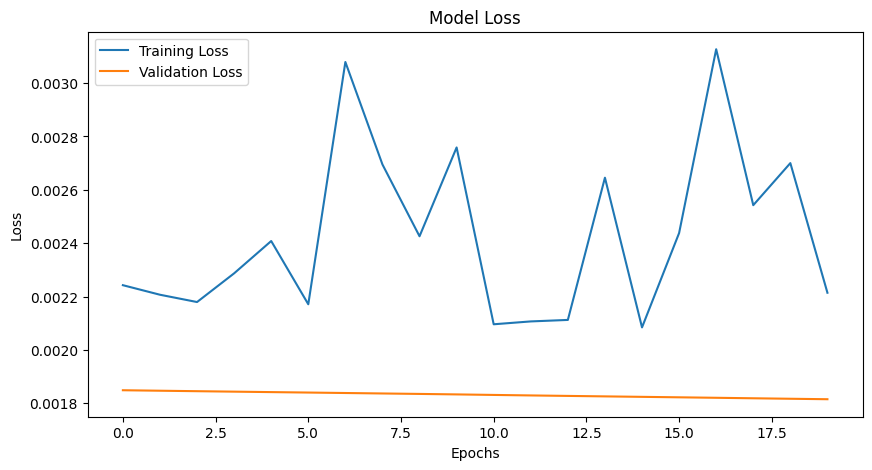

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Confusion Matrix:
 [[7]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate predictions and evaluate
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Convert data and labels to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Ensure correct input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Choose an optimizer
    loss='binary_crossentropy',          # Loss function for binary classification
    metrics=['accuracy']                 # Metrics to monitor during training
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,                            # Number of training epochs
    batch_size=32,                        # Batch size for training
    callbacks=[early_stopping],           # Optional callbacks
    verbose=1                             # Display progress
)



Epoch 1/20


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 1)

In [ ]:
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


y_train shape: (29, 10)
y_val shape: (6, 10)


In [ ]:
import numpy as np
y_train = np.array(y_train).reshape(-1)  # Flatten to 1D
y_val = np.array(y_val).reshape(-1)      # Flatten to 1D


In [ ]:
# ipython-input-211-74d6828ccaf9
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Time steps and features
    LSTM(32, return_sequences=True),                   # First LSTM layer
    Dropout(0.6),                                      # Dropout for regularization
    LSTM(16, return_sequences=False),                  # Second LSTM layer
    Dense(1, activation='sigmoid')                     # Single output for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Adding compile step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Convert data and labels to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Ensure correct input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Choose an optimizer
    loss='binary_crossentropy',          # Loss function for binary classification
    metrics=['accuracy']                 # Metrics to monitor during training
)

# Reshape y_train and y_val to (num_samples,) if they are not already in this shape
y_train = y_train.reshape(-1)
y_val = y_val.reshape(-1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,                            # Number of training epochs
    batch_size=32,                        # Batch size for training
    callbacks=[early_stopping],           # Optional callbacks
    verbose=1                             # Display progress
)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 29
'y' sizes: 290


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


ValueError: Unrecognized data type: x=[[[0.29444444]
  [0.175     ]
  [0.23055556]
  [0.15      ]
  [0.225     ]
  [0.41944444]
  [0.2       ]
  [0.25277778]
  [0.25833333]
  [0.18888889]]

 [[0.24444444]
  [0.16388889]
  [0.33611111]
  [0.23888889]
  [0.15555556]
  [0.16666667]
  [0.16111111]
  [0.15555556]
  [0.21388889]
  [0.20833333]]

 [[0.33888889]
  [0.15555556]
  [0.29722222]
  [0.14166667]
  [0.24444444]
  [0.24722222]
  [0.24444444]
  [0.22222222]
  [0.175     ]
  [0.14166667]]

 [[0.23611111]
  [0.19722222]
  [0.14444444]
  [0.16388889]
  [0.23055556]
  [0.18333333]
  [0.20555556]
  [0.225     ]
  [0.26666667]
  [0.13888889]]

 [[0.19166667]
  [0.24722222]
  [0.23888889]
  [0.20555556]
  [0.31111111]
  [0.17777778]
  [0.16944444]
  [0.41388889]
  [0.17777778]
  [0.14166667]]

 [[0.22777778]
  [0.16944444]
  [0.19166667]
  [0.34166667]
  [0.14444444]
  [0.14166667]
  [0.16666667]
  [0.18333333]
  [0.19722222]
  [0.20277778]]

 [[0.27777778]
  [0.31388889]
  [0.29166667]
  [0.24444444]
  [0.25555556]
  [0.15833333]
  [0.31388889]
  [0.23611111]
  [0.23055556]
  [0.19722222]]] (of type <class 'numpy.ndarray'>)

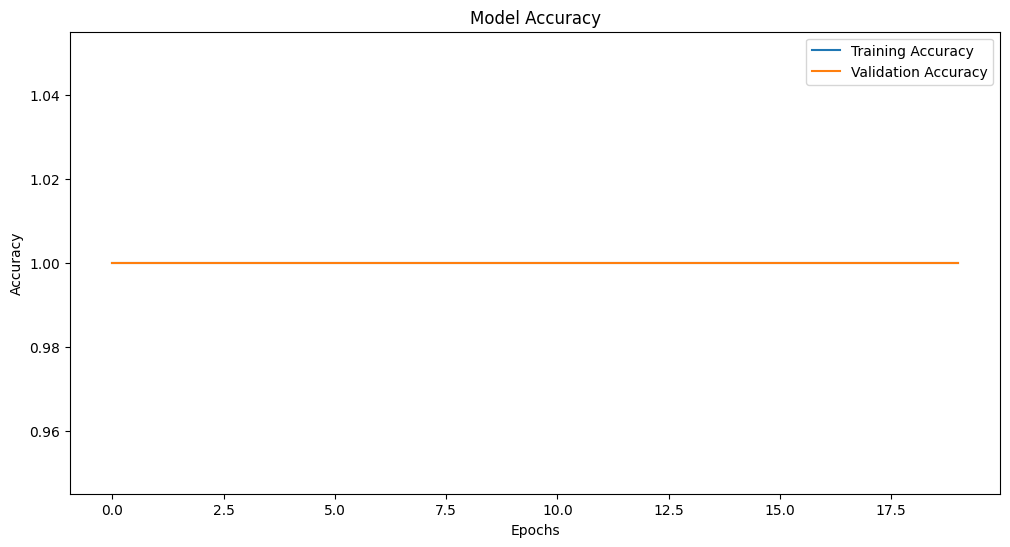

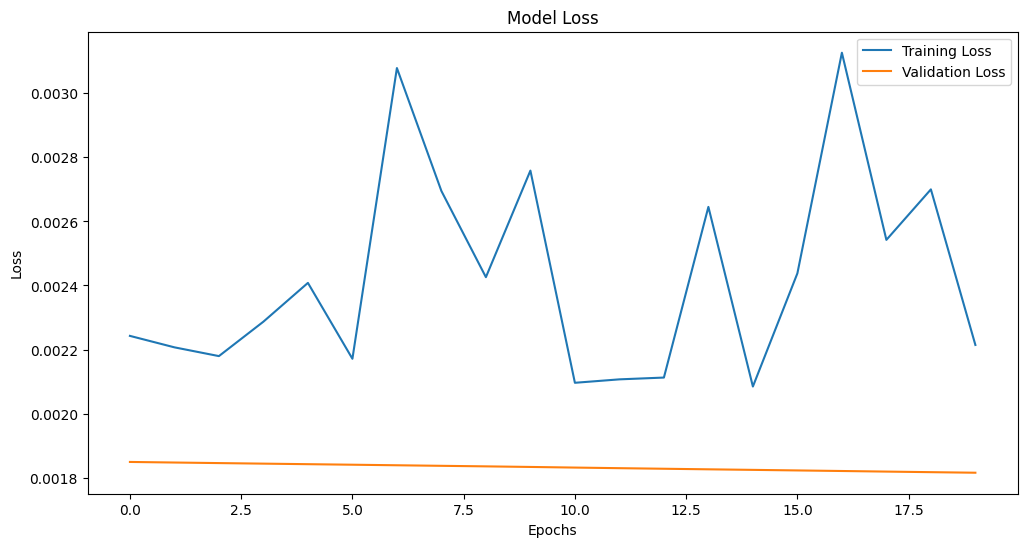

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Generate predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       7.0

    accuracy                           0.00       7.0
   macro avg       0.00      0.00      0.00       7.0
weighted avg       0.00      0.00      0.00       7.0

Confusion Matrix:
[[0 0]
 [7 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (22, 10, 1)
y_train shape: (22,)
X_val shape: (6, 10, 1)
y_val shape: (6,)


In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(16, return_sequences=True, kernel_regularizer=l2(0.01)),  # Reduce units and add L2
    Dropout(0.7),  # Increase dropout
    LSTM(8, return_sequences=False, kernel_regularizer=l2(0.01)),  # Further reduce units
    Dense(1, activation='sigmoid')
])


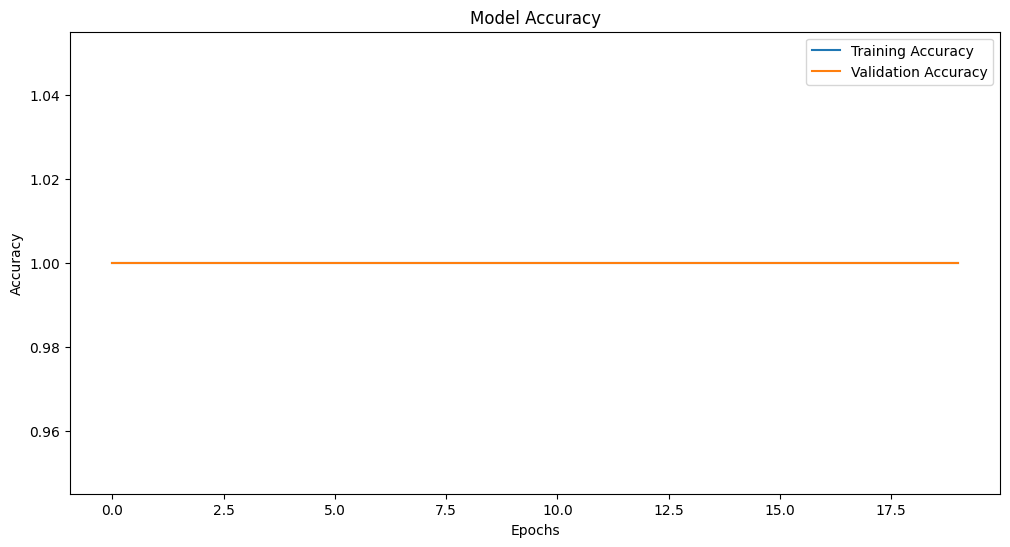

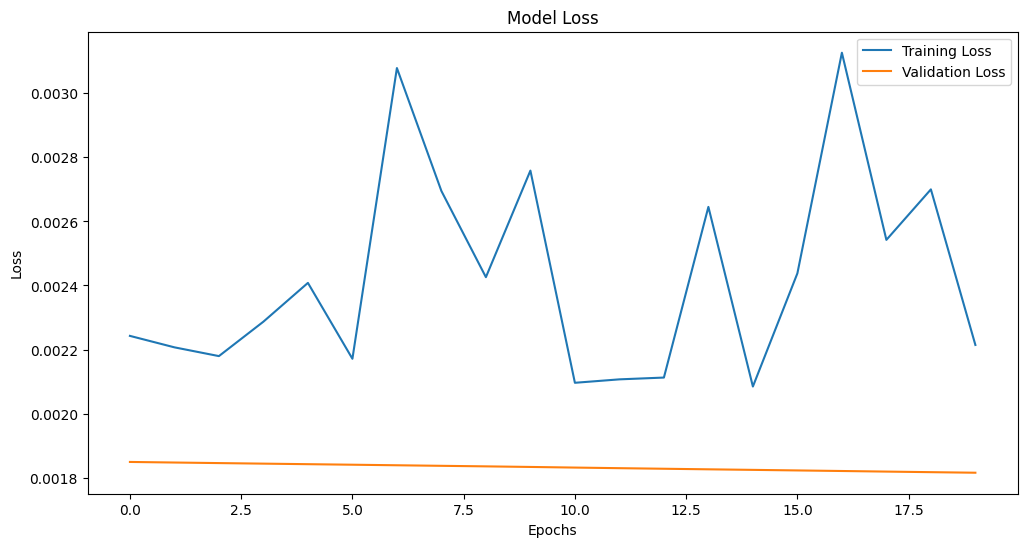

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
sequence_length = 10  # Length of each sequence
segments = []
labels = []

for rr_intervals in all_rr_intervals:
    for start in range(0, len(rr_intervals) - sequence_length):
        segment = rr_intervals[start:start + sequence_length]
        segments.append(segment)

        # Example: Assign binary labels (replace with your logic)
        if np.mean(segment) > 0.8:  # Replace with actual label assignment logic
            labels.append(0)  # Abnormal
        else:
            labels.append(1)  # Normal

X_train = np.array(segments).reshape(len(segments), sequence_length, 1)
y_train = np.array(labels)


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (67, 10, 1)
y_train shape: (67,)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/20
1/3 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step - accuracy: 0.1875 - loss: 0.6984

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 6
'y' sizes: 60


In [ ]:
sequence_length = 10  # Length of each sequence
segments = []
labels = []

# Example: Create segments and labels
for rr_intervals in all_rr_intervals:
    for start in range(0, len(rr_intervals) - sequence_length):
        segment = rr_intervals[start:start + sequence_length]
        segments.append(segment)

        # Example: Generate binary labels (adjust logic as needed)
        if np.mean(segment) > 0.8:  # Replace with your actual label logic
            labels.append(0)  # Abnormal
        else:
            labels.append(1)  # Normal

# Convert to NumPy arrays
X_train = np.array(segments).reshape(len(segments), sequence_length, 1)
y_train = np.array(labels)


In [ ]:
print(f"X_train shape: {X_train.shape}")  # Expected: (num_samples, sequence_length, features)
print(f"y_train shape: {y_train.shape}")  # Expected: (num_samples,)


X_train shape: (67, 10, 1)
y_train shape: (67,)


In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input: (sequence length, features)
    LSTM(32, return_sequences=True),                   # First LSTM layer
    Dropout(0.6),                                      # Dropout for regularization
    LSTM(16, return_sequences=False),                  # Second LSTM layer
    Dense(1, activation='sigmoid')                     # Single output for binary classification
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # For binary classification
    metrics=['accuracy']
)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (46, 10, 1)
X_val shape: (10, 10, 1)
X_test shape: (11, 10, 1)
y_train shape: (46,)
y_val shape: (10,)
y_test shape: (11,)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 436ms/step - accuracy: 0.0870 - loss: 0.7056 - val_accuracy: 1.0000 - val_loss: 0.6879
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8111 - loss: 0.6849 - val_accuracy: 1.0000 - val_loss: 0.6696
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.6694 - val_accuracy: 1.0000 - val_loss: 0.6514
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.6492 - val_accuracy: 1.0000 - val_loss: 0.6329
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.6313 - val_accuracy: 1.0000 - val_loss: 0.6140
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.6121 - val_accuracy: 1.0000 - val_loss: 0.5940
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.5946 - val_accuracy: 1.0000 - val_loss: 0.5727
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.5711 - val_accuracy: 1.0000 - val_loss: 0.5495

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Simplified and regularized model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(16, return_sequences=False, kernel_regularizer=l2(0.01)),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping with stricter patience
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 785ms/step - accuracy: 0.4937 - loss: 0.7136 - val_accuracy: 1.0000 - val_loss: 0.6985
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.5539 - loss: 0.6961 - val_accuracy: 1.0000 - val_loss: 0.6883
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.6431 - loss: 0.6872 - val_accuracy: 1.0000 - val_loss: 0.6781
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7034 - loss: 0.6807 - val_accuracy: 1.0000 - val_loss: 0.6678
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7926 - loss: 0.6704 - val_accuracy: 1.0000 - val_loss: 0.6573
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8465 - loss: 0.6529 - val_accuracy: 1.0000 - val_loss: 0.6467
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8859 - loss: 0.6489 - val_accuracy: 1.0000 - val_loss: 0.6360
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9212 - loss: 0.6309 - val_accuracy: 1.0000 - val_loss: 0.62

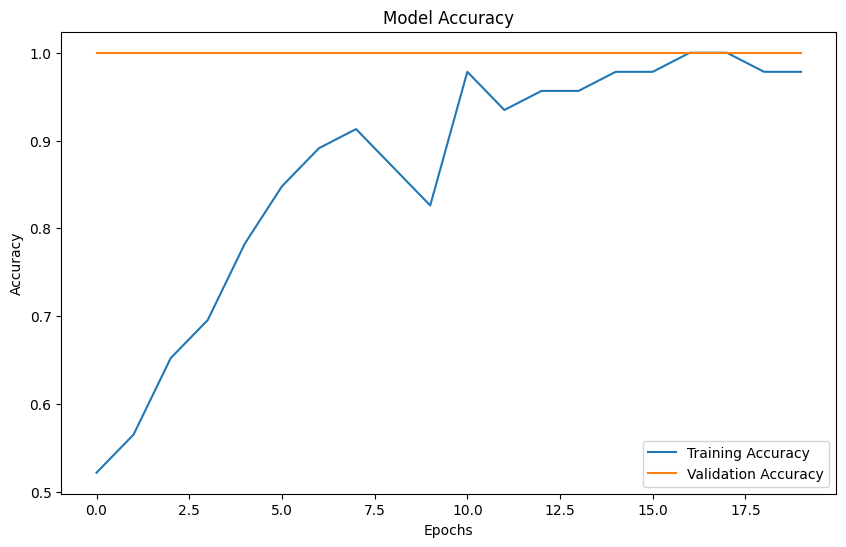

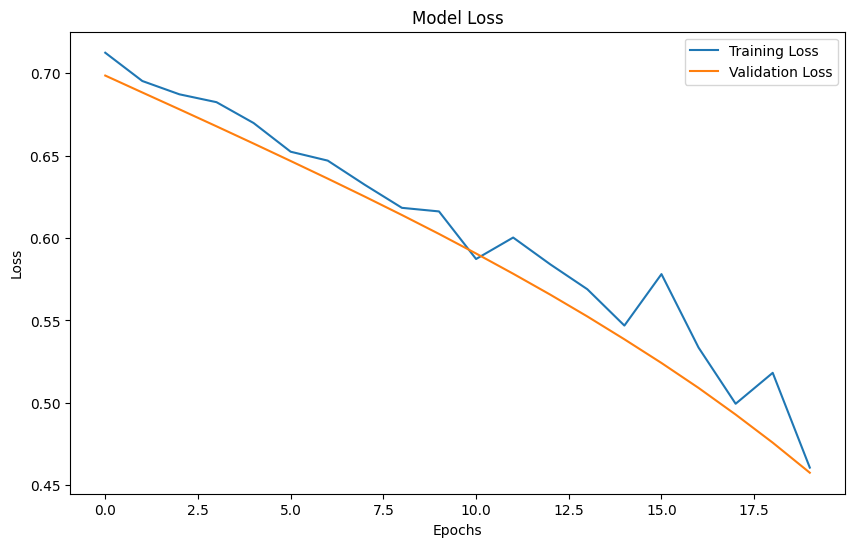

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(16, kernel_regularizer=l2(0.01), return_sequences=False),
    Dropout(0.7),  # Dropout to further prevent overfitting
    Dense(1, activation='sigmoid')
])


In [ ]:
Dropout(0.8)


<Dropout name=dropout_21, built=False>

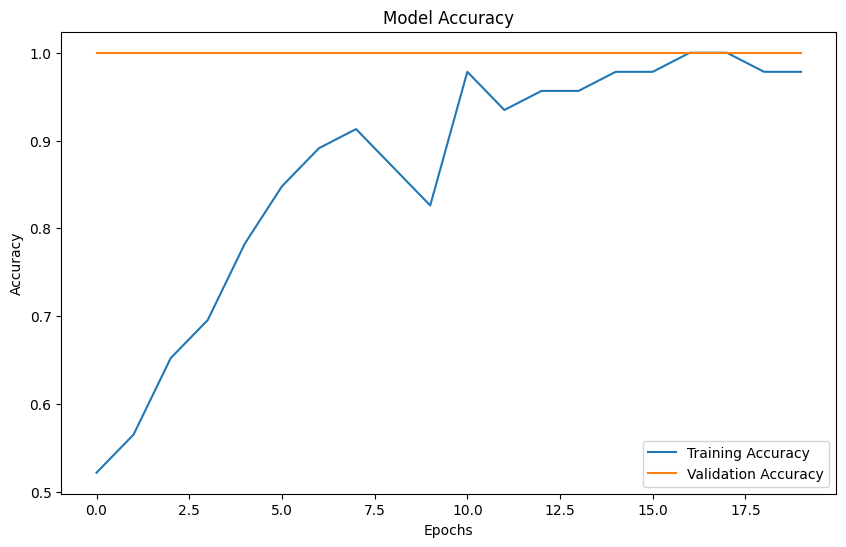

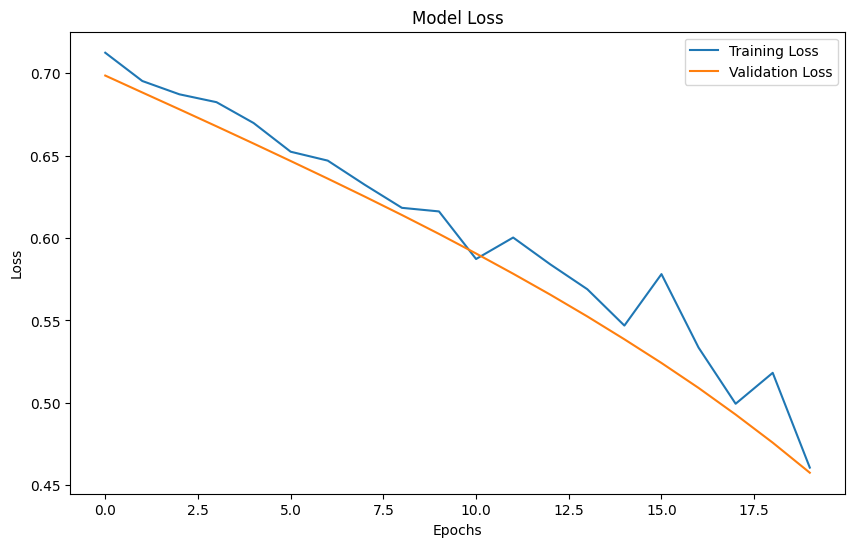

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

# Define model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(16, return_sequences=False, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5539 - loss: 0.6889 - val_accuracy: 0.0000e+00 - val_loss: 0.7211 - learning_rate: 0.0010
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5041 - loss: 0.7247 - val_accuracy: 0.0000e+00 - val_loss: 0.7151 - learning_rate: 0.0010
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5498 - loss: 0.7257 - val_accuracy: 0.9000 - val_loss: 0.7088 - learning_rate: 0.0010
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5498 - loss: 0.7548 - val_accuracy: 1.0000 - val_loss: 0.7021 - learning_rate: 0.0010
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6784 - loss: 0.6769 - val_accuracy: 1.0000 - val_loss: 0.6952 - learning_rate: 0.0010
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5684 - loss: 0.6788 - val_accuracy: 1.0000 - val_loss: 0.6881 - learning_rate: 0.0010
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7074 - loss: 0.6735 - val_accuracy: 

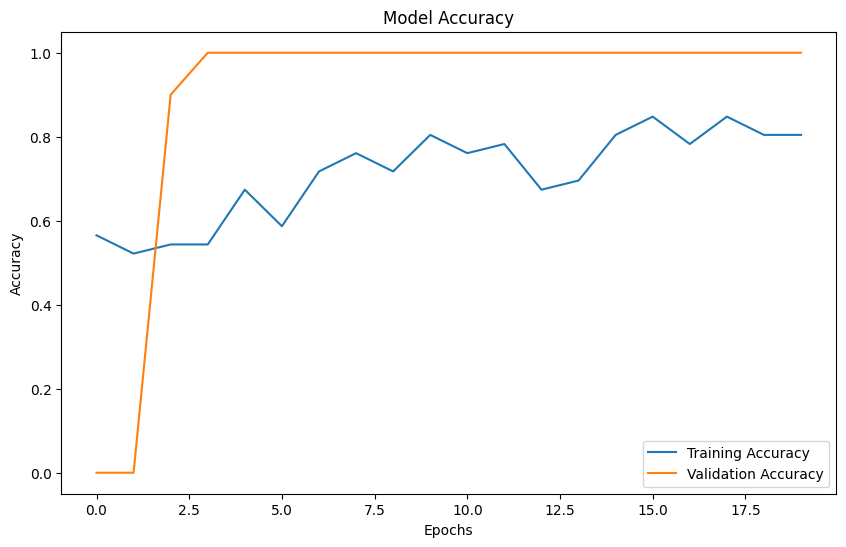

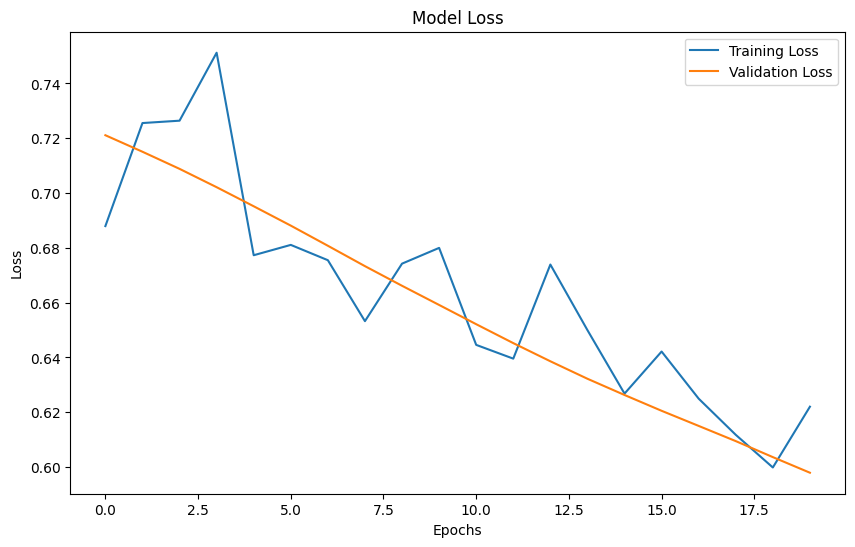

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 609ms/step - Precision: 1.0000 - Recall: 0.5747 - accuracy: 0.5747 - loss: 0.7211 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7564 - learning_rate: 0.0010
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - Precision: 1.0000 - Recall: 0.6825 - accuracy: 0.6825 - loss: 0.7039 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7485 - learning_rate: 0.0010
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - Precision: 1.0000 - Recall: 0.5457 - accuracy: 0.5457 - loss: 0.7270 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7413 - learning_rate: 0.0010
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - Precision: 1.0000 - Recall: 0.5145 - accuracy: 0.5145 - loss: 0.7037 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7347 - learning_rate: 0.0010
Epoch 5/20
2/2 ━━━━━━━━━━━━

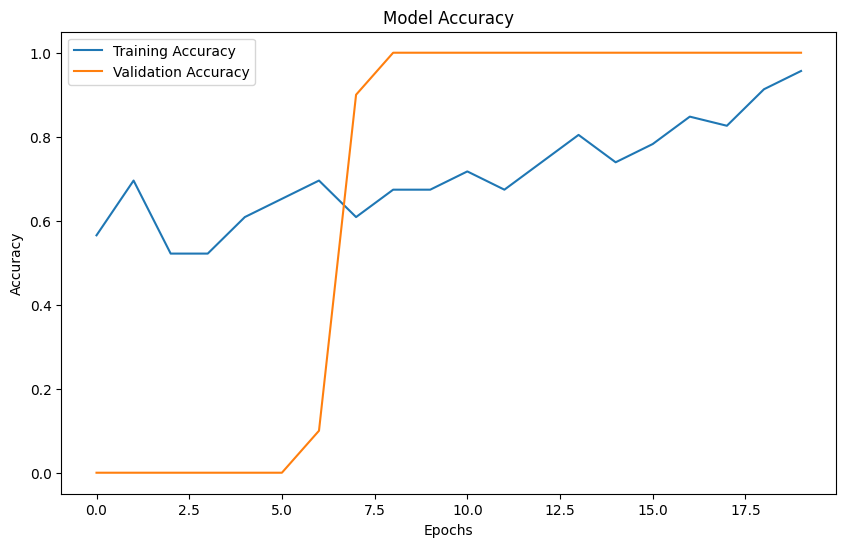

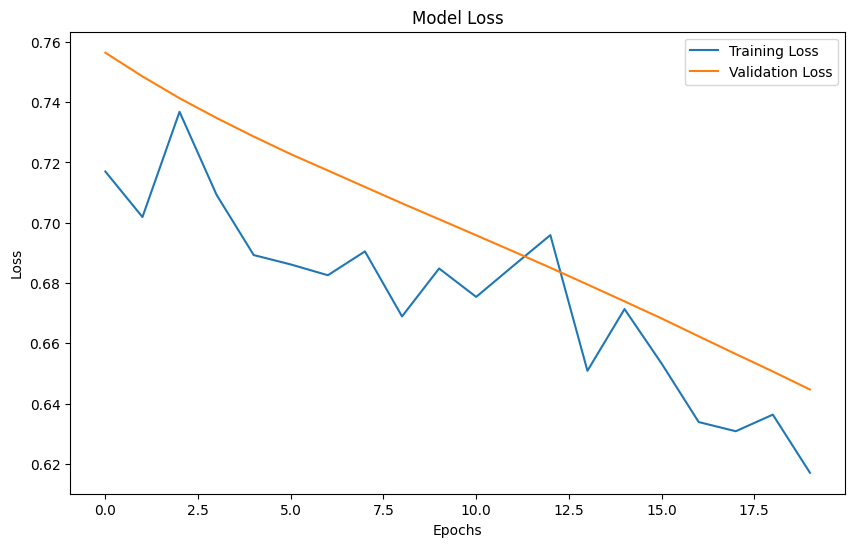

In [ ]:

# Define an improved and regularized model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(16, return_sequences=False, kernel_regularizer=l2(0.01)),
    BatchNormalization(),  # Stabilize training
    Dropout(0.7),          # High dropout for regularization
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(
    optimizer='adam',                # Adaptive learning rate optimizer
    loss='binary_crossentropy',      # Loss for binary classification
    metrics=['accuracy', 'Precision', 'Recall']  # Track additional metrics
)

# Callbacks for better training control
early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    class_weight=class_weights,  # Use computed class weights
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)



# Plot the training history
import matplotlib.pyplot as plt

def plot_accuracy_loss(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_accuracy_loss(history)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - Precision: 1.0000 - Recall: 0.4643 - accuracy: 0.4643 - loss: 0.7664 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7477 - learning_rate: 0.0010
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - Precision: 1.0000 - Recall: 0.5357 - accuracy: 0.5357 - loss: 0.7425 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7442 - learning_rate: 0.0010
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - Precision: 1.0000 - Recall: 0.6786 - accuracy: 0.6786 - loss: 0.7117 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7407 - learning_rate: 0.0010
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - Precision: 1.0000 - Recall: 0.6429 - accuracy: 0.6429 - loss: 0.7341 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.7372 - learning_rate: 0.0010
Epoch 5/20
1/1 ━━━━━━━━━━━━

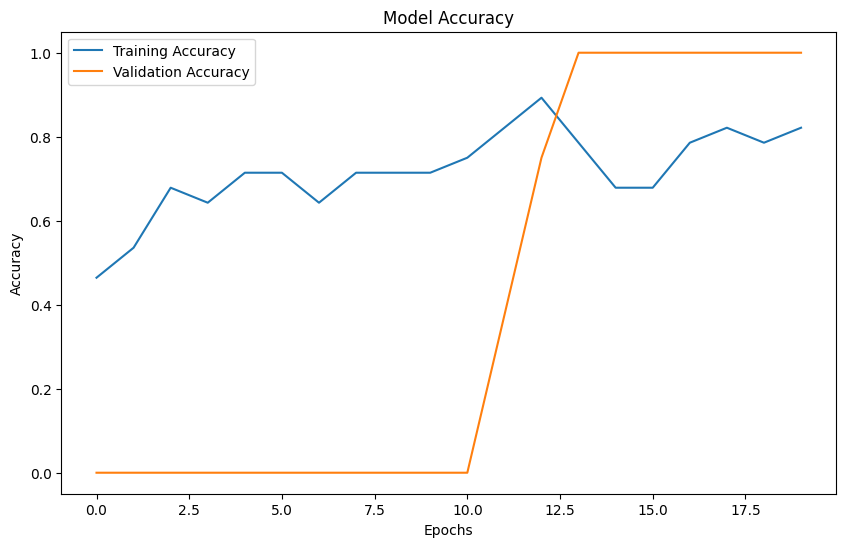

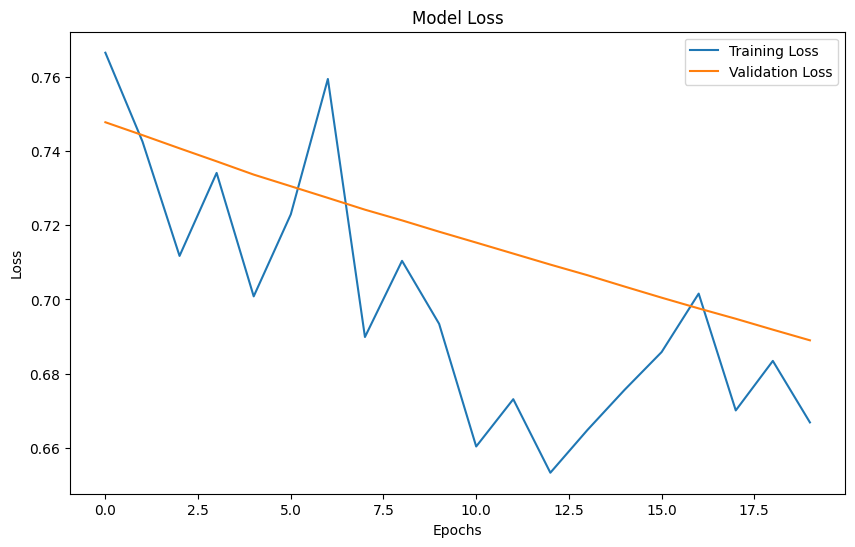

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your original full dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, shuffle=True
)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Define an improved model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(16, return_sequences=False, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


# Plot training history
plot_accuracy_loss(history)
